# 链接仪器

In [402]:
from qulab.sugar import connect
from qulab.job import Job
from qulab.storage.utils import save
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np, sympy as sy, visa
from collections import namedtuple, deque, defaultdict, OrderedDict, Counter
from scipy.optimize import curve_fit, least_squares as ls
import time, asyncio, sys, imp, pandas as pd, scipy
from tqdm import tqdm_notebook as tqdm
from easydl import clear_output
from sklearn.cluster import KMeans
from configparser import ConfigParser
from qulab import optimize, measureroutine_population, computewave_wave, imatrix, waveform_new, measureroutine, computewave, dataTools
# from qulab.waveform import CosPulseDrag, Expi, DC, Step, Gaussian
from qulab.math.qst import transformList, acquireVFromData, vToRho
from qulab.math import opt
opt = imp.reload(opt)
op = imp.reload(optimize)
mrw = imp.reload(measureroutine_population)
cww = imp.reload(computewave_wave)
mx = imp.reload(imatrix)
wn = imp.reload(waveform_new)
dt = imp.reload(dataTools)
# mr = imp.reload(measureroutine)
# cw = imp.reload(computewave)
# mn = imp.reload(measureroutine_new)
# wf = imp.reload(wavepoint)

In [403]:
# await awg134.close_all()

In [404]:
awg131 = await connect('AWG131')
awg132 = await connect('AWG132')
awg133 = await connect('AWG133')
awg134 = await connect('AWG134')
afg= await connect('AFG')
awg100 = await connect('AWG100')
ats18 = await connect('ATS18')
# ats19 = await connect('ATS19')
psg101 = await connect('PSG101')
psg230 = await connect('PSG230')
# psg104 = await connect('PSG104')
# psg103 = await connect('PSG103')
psg105 = await connect('PSG105')
psg106 = await connect('PSG106')
dc01 = await connect('DC01')
dc02 = await connect('DC02')
dc03 = await connect('DC03')
dc04 = await connect('DC04')
dc05 = await connect('DC05')
dc06 = await connect('DC06')
dc07 = await connect('DC07')
dc08 = await connect('DC08')
dc10 = await connect('DC10')
dc11 = await connect('DC11')
dc15 = await connect('DC15')
dc20 = await connect('DC20')
afg = await connect('AFG')
# att3 = await connect('Att3')
# att4 = await connect('Att4')
# att5 = await connect('Att5')
# att6 = await connect('Att6')
# att7 = await connect('Att7')
# att8 = await connect('Att8')
# att9 = await connect('Att9')
# # #pna = await connect('PNA')

In [57]:
t_new = np.linspace(-45000,5000,125000)*1e-9
t_list = t_new*1e9 - np.min(t_new)*1e9
t_list

array([0.000000e+00, 4.000032e-01, 8.000064e-01, ..., 4.999920e+04,
       4.999960e+04, 5.000000e+04])

In [211]:
await dc10.query('*IDN?')

'HEWLETT-PACKARD,33120A,0,8.0-5.0-1.0\n'

# redis测试

In [75]:
import redis

# 普通连接
conn = redis.Redis(host="10.122.7.20",port=6379)
conn.set("x1","hello",ex=1) # ex代表seconds，px代表ms
val = conn.get("x1")
print(val)

b'hello'


In [4]:
# rm = visa.ResourceManager()
# awg133 = rm.open_resource('TCPIP::10.122.7.133')
# x = awg133.query('*IDN?')

# 设置TrigB

In [5]:
await afg.reset()
await asyncio.sleep(2)
await afg.setValue('Output','ON',ch=1)
await afg.setValue('Function','Pulse',ch=1)
await afg.setValue('Pulse Period',110e-6,ch=1)
await afg.setValue('Pulse Width',1e-6,ch=1)
await afg.setValue('Amplitude',5,ch=1)
await afg.setValue('Offset',0,ch=1)

In [18]:
for i in range(20):
    await awg100.stop()
    await afg.write('*TRG')
    await awg100.run()
    time.sleep(1)

# qubit工作点

In [4]:
# freqall = np.array([6.505,6.517,6.53,6.542,6.559,6.571,6.587,6.601,6.6045,6.63])*1e9
# freqall = np.array([6.451,6.466,6.478,6.494,6.51,6.508,6.516,6.534,6.563,6.576])*1e9
freqall = np.array([6.545, 6.564, 6.588, 6.608, 6.63, 6.642, 6.649, 6.689, 6.71, 6.73])*1e9
# freqall = freqall[::-1]
f_cavity = {'q%d'%(i):j for i, j in enumerate(freqall,start=1)}

In [171]:
measure.freqall = f_cavity

In [257]:
measure.jpa = jpa

In [210]:
# jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-0.825,f_ex=2*6.76e9+2e6,power_ex=4.73) #power=-2.1 

In [250]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-1.397,f_ex=2*6.74e9+2e6,power_ex=7.34)

In [5]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-1.428,f_ex=2*6.75e9+2e6,power_ex=5.24)

In [253]:
# jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-1.137,f_ex=2*6.755e9+2e6,power_ex=4.8)

## 保存工作点

In [399]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i.asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name\wave')
with open(r'D:\skzhao\file_name\qubit_state_wave.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\wave\2020\1124\QubitState\qubitstate_20201124003343.npz


In [3]:
import numpy as np
0 << 2

0

## 提取工作点

In [407]:
fl = np.loadtxt(r'D:\skzhao\file_name\qubit_state_wave.txt',dtype='str')
f = str(fl[-1])
data = np.load(f,allow_pickle=True)
def dict2tuple(q):
    for i,k in enumerate(q):
        attr = {}
        for j in mrw.qubit().asdict():
            if j in k:
                attr[j] = k[j]
            else:
                attr[j] = None
        globals()[k['q_name']] = mrw.qubit(**attr)

dict2tuple(data['state'])
print(f)



D:\skzhao\file_name\wave\2020\1124\QubitState\qubitstate_20201124184823.npz


In [8]:
q3.asdict()

{'q_name': 'q3',
 'inst': {'z_awg': 'awg132',
  'z_ch': [5],
  'ex_awg': 'awg134',
  'ex_ch': [3, 7],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.703, 0.16],
 'T_z': [1.676, 0.114],
 'specinterp': [array([4.14410001, 4.14410758, 4.14411515, ..., 5.29363958, 5.29364151,
         5.29364345]),
  array([-0.5       , -0.49999856, -0.49999712, ..., -0.14000288,
         -0.14000144, -0.14      ])],
 'specfunc': 5.34571620457854*(0.298571282705535*tan(1.87215319822776*x - 0.190959626219232)**2 + 1)**(1/4)*sqrt(Abs(cos(1.87215319822776*x - 0.190959626219232))) - 0.684380714178389,
 'specfuncz': [5.74709235817411*(6.80189049502004e-6*tan(1.81609274332375*x - 0.0016853551657154)**2 + 1)**(1/4)*sqrt(Abs(cos(1.81609274332375*x - 0.0016853551657154))) - 0.359072266966759,
  0.10202114460312545,
  1.7298635574305334,
  11.49805819466171,
  0.35907226696675903,
  -0.002608043422763517],
 'specfunc_cavity': sqrt((5.34571620457854*(0.298571282705535*tan(1.87215319822776*x - 0.190959626219232

In [409]:
measure.qubits['q10'].asdict()

{'q_name': 'q10',
 'inst': {'z_awg': 'awg131',
  'z_ch': [5],
  'ex_awg': 'awg134',
  'ex_ch': [2, 6],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.966, 0.068],
 'T_z': [1.787, 0.056],
 'specinterp': [array([4.65515808, 4.65516678, 4.65517548, ..., 5.72418973, 5.72418994,
         5.72419015]),
  array([-5.000000e-01, -4.999980e-01, -4.999960e-01, ..., -4.000016e-06,
         -2.000008e-06,  0.000000e+00])],
 'specfunc': 1.51344959922872*(0.938575005349587*tan(1.69561542080395*x - 0.176344003763611)**2 + 1)**(1/4)*sqrt(Abs(cos(1.69561542080395*x - 0.176344003763611))) - 0.644707113539116,
 'specfuncz': [5.85101989573697*(0.00469298661654138*tan(1.64089637974623*x - 0.0217646468575629)**2 + 1)**(1/4)*sqrt(Abs(cos(1.64089637974623*x - 0.0217646468575629))) - 0.126140079506901,
  0.10380635967707191,
  1.9145588303849175,
  33.92501609533709,
  0.12614007950690131,
  0.06850537655207352],
 'specfunc_cavity': sqrt((1.51344959922872*(0.938575005349587*tan(1.69561542080395*x - 0.176

In [408]:
qubitlist = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
measure.qubits= {i.q_name:i for i in qubitlist}

# 提取IQ-Mixer配置参数

In [258]:
fl = np.loadtxt(r'D:\skzhao\file_name\iqmixer_state.txt',dtype='str')
f = str(fl[-1])
data = np.load(f,allow_pickle=True)

atributte = ['q_name','alpha_read','alpha_ch1','alpha_ch2','alpha_ch3','alpha_ch4','alpha_ch5',\
            'beta_read','beta_ch1','beta_ch2','beta_ch3','beta_ch4','beta_ch5']
Iqmixer = namedtuple('Iqmixer',atributte,defaults=[{} for i in range(12)])

iqm = Iqmixer(q_name='Iqm') #power=-2.1

def dict2tuple(q):
    global iqm
    for i,k in enumerate(q):
        attr = []
        for j in atributte:
            if j in k:
                attr.append(k[j])
            else:
                attr.append(None)
        iqm = Iqmixer(*attr)

dict2tuple(data['state'])
# print(f,iqm)

In [260]:
iqm.beta_read

{'6.632150': array([ 0.002, -0.005]), '6.759000': array([ 0.001, -0.008])}

In [261]:
ch_I, ch_Q, offset_I, offset_Q = 1,5,0.001, -0.008
awg = awg133
await awg.setValue('Offset',offset_I,ch=ch_I)
await awg.setValue('Offset',offset_Q,ch=ch_Q)

## 保存提取全局变量

In [433]:
cw.saveStatus(fname='D:/status.obj')

In [5]:
cw.loadStatus(fname='D:/status.obj')

# 指定仪器

In [7]:
psg_lo = psg105
psg_ex1 = psg106
psg_trans = psg230
# psg_ex2 = psg106
# psg_ex3 = psg103
psg_pump = psg101
psg = {'psg_lo':psg_lo,'psg_ex1':psg_ex1,'psg_trans':psg_trans,'psg_pump':psg_pump}
ats = ats18
dc = {'q8':dc01,'q6':dc02,'q3':dc11,'q5':dc03,'q4':dc08,\
      'q9':dc07,'q2':dc10,'q7':dc06,'jpa':dc15,'q10':dc05,'q1':dc20}
#awg = awg132
# attinst = {'com3':att3,'com4':att4,'com5':att5,'com6':att6,'com7':att7,'com8':att8,'com9':att9}
attinst={}
awg_list = {'awg131':awg131,'awg132':awg132,'awg133':awg133,'awg134':awg134,'awgread':awg133,'awg_trig':awg133,'awg_trig100':awg100}

In [333]:
measure.awg = awg_list

In [15]:
measure.dc = dc

## 测量类

In [8]:
measure = mrw.common(f_cavity,ats,dc,psg,awg_list,attinst,jpa,[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10])

# 初始化及同步AWG

In [12]:
await mrw.resetAwg(awg_list)

In [13]:
await mrw.awgSync(measure)

In [94]:
with open(r'D:\QuLabData\awgGui\state.txt', mode='w') as filename:
    filename.write('[5,0,75,65]')
    filename.write('\n') 

In [56]:
x = np.loadtxt(r'D:\QuLabData\awgGui\state.txt',delimiter=',',dtype=str)

# 信号检查

In [82]:
# delta = np.array([1.75e+08, 1.62e+08, 1.49e+08, 1.36e+08, 1.21e+08, 1.07e+08,
#        9.30e+07, 8.00e+07, 7.50e+07, 5.00e+07])
# f_lo, delta, n = await mr.resn(f)
# delta = measure.delta
delta = np.array([20e6])
await cww.modulation_read(measure,delta,readlen=1200)
# await mr.ats_setup(ats,delta,l=180+128)
await awg133.run()
f_list = await ats.getValue('f_list')
f_list

array([20000000.])

In [127]:
f_list = await ats.getValue('repeats')
f_list

3008

## 读出信号相位噪声

Output()

<IPython.core.display.Javascript object>


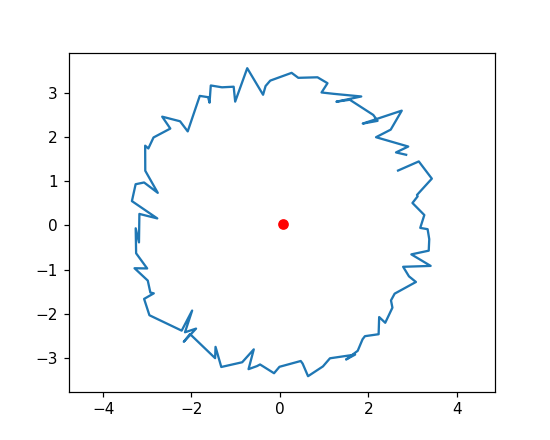

In [178]:
phase = np.linspace(0,2*np.pi,101)
job = Job(mrw.rPhase, (measure,phase), tags=['phase noise'], max=len(phase))
pp, sp = await job.done()
plt.figure(figsize=(5,4))
plt.plot(np.real(sp[:,0]),np.imag(sp[:,0]))
plt.plot(np.mean(np.real(sp[:,0])),np.mean(np.imag(sp[:,0])),'ro')
plt.axis('equal')
plt.show()

In [34]:
f_list = await ats.setValue('repeats',201)

In [70]:
f_list = await ats.getValue('f_list')
f_list

array([50000000.])

In [76]:
await psg_lo.setValue('Frequency',6.56e9)

## 复平面信号

<IPython.core.display.Javascript object>


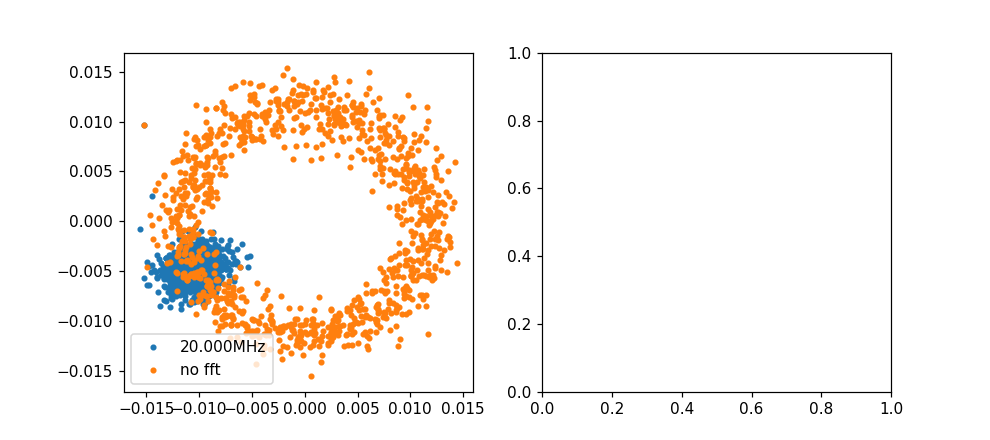

In [133]:

I, Q = 0, 0
await psg_lo.setValue('Output','ON')
await psg_ex1.setValue('Output','OFF')
# await mrw.jpa_switch(measure,state='OFF')
f_list = np.array(await ats.getValue('f_list'))
for i in range(1):
    chA, chB, ch_I, ch_Q = await ats.getTraces(fft=False,avg=True,hilbert=True,is2ch=False,offset=True)
    I += chA
    Q += chB
s, e, h = (I+1j*Q), [], len(f_list)//2+len(f_list)%2
t = np.arange(0, len(s), 1) / 1e9

fig, axes = plt.subplots(ncols=2,nrows=h,figsize=(9,4*h))
for i,f in enumerate(f_list):
    em = np.exp(-1j * 2 * np.pi * f * t)
    e.append(em)
    if h == 1:
        axes[i].plot(np.real(s*em),np.imag(s*em),'.',label='%.3fMHz'%(f/1e6))
        axes[i].plot(np.real(s),np.imag(s),'.',label='no fft')
        axes[i].legend(loc="lower left")
    else:
        axes[i//2][i%2].plot(np.real(s*em),np.imag(s*em),'.',label='%.3fMHz'%(f/1e6))
        axes[i//2][i%2].plot(np.real(s),np.imag(s),'.',label='no fft')
        axes[i//2][i%2].legend(loc="lower left")

plt.show()

## 时域信号

<IPython.core.display.Javascript object>


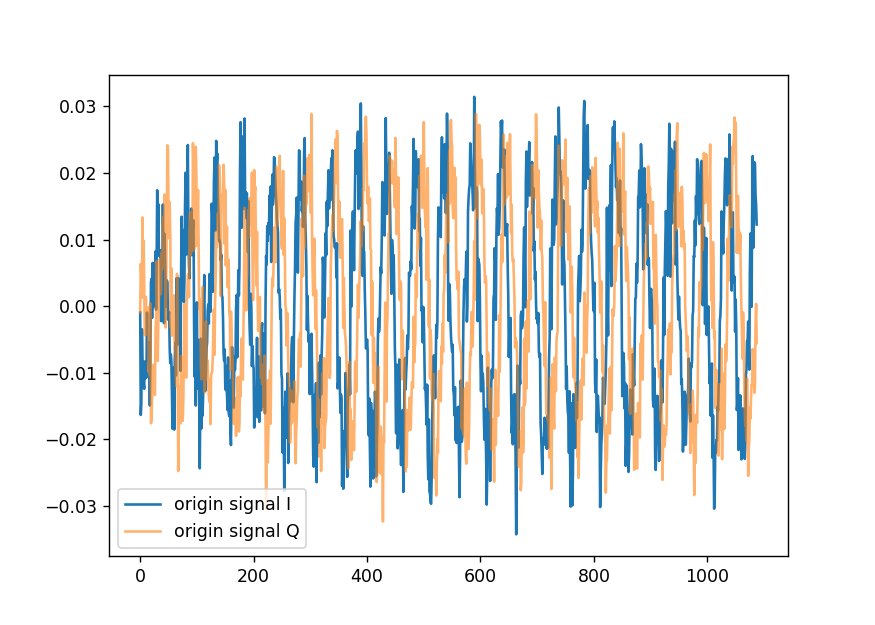

In [35]:
%matplotlib notebook
I, Q = 0, 0
await psg['psg_lo'].setValue('Output','ON')
# await psg['psg_ex1'].setValue('Output','OFF')
for i in range(1):
    chA, chB, ch_I, ch_Q = await ats.getTraces(hilbert=False,is2ch=False)
    I += chA
    Q += chB
    
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(I)), I,label='origin signal I')
plt.plot(np.arange(len(Q)), Q,label='origin signal Q',alpha=0.6)
# plt.plot(np.arange(len(Q)), np.sqrt(I**2+Q**2),label='envelop')
plt.legend(loc="lower left")
plt.show()

<IPython.core.display.Javascript object>


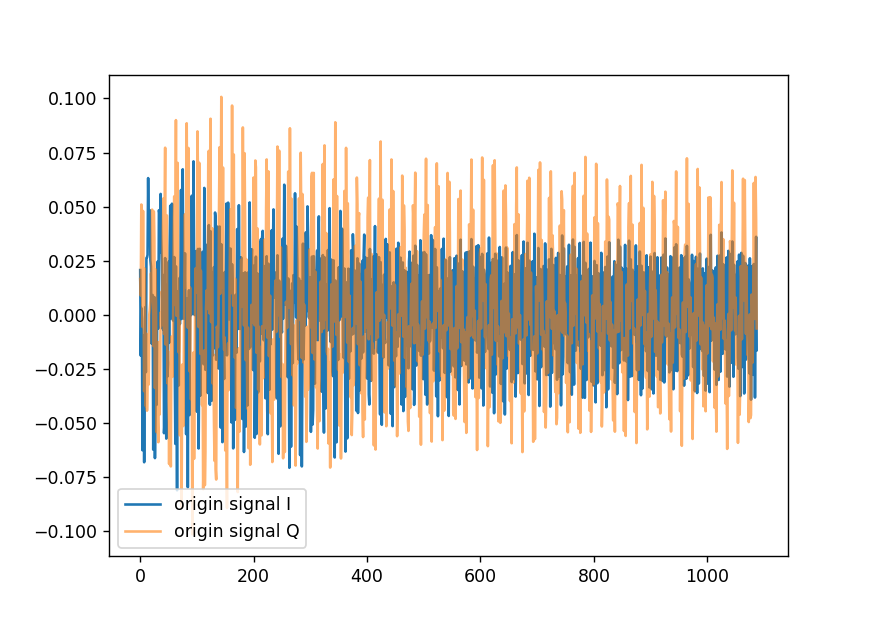

In [501]:
%matplotlib notebook
I, Q = 0, 0
await psg['psg_lo'].setValue('Output','ON')
# await psg['psg_ex1'].setValue('Output','OFF')
for i in range(1):
    chA, chB, ch_I, ch_Q = await ats.getTraces(hilbert=False,is2ch=False)
    I += chA
    Q += chB
    
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(I)), I,label='origin signal I')
plt.plot(np.arange(len(Q)), Q,label='origin signal Q',alpha=0.6)
# plt.plot(np.arange(len(Q)), np.sqrt(I**2+Q**2),label='envelop')
plt.legend(loc="lower left")
plt.show()

In [118]:
await psg_lo.setValue('Frequency',5e9)

## 频域信号

<IPython.core.display.Javascript object>


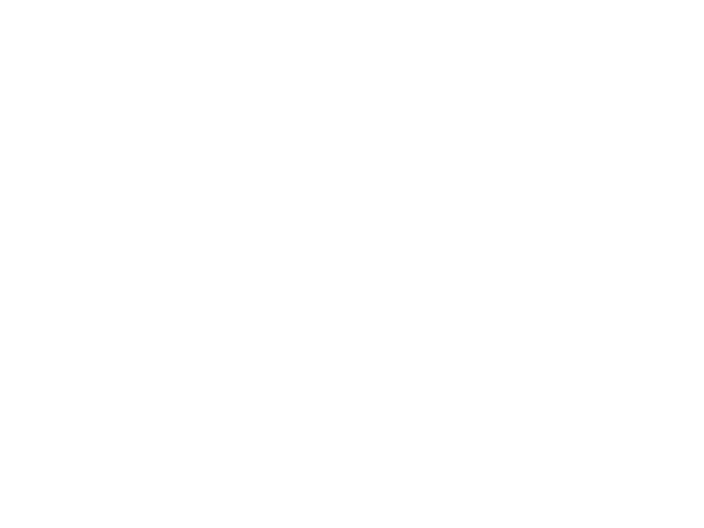

In [239]:
f = np.fft.fftshift(np.fft.fftfreq(len(I)))*1e9
Pxx = np.abs(np.fft.fftshift(np.fft.fft(I + 1j*Q)))
# x, y = np.linspace(0,len(I),len(I))*1e-9, I + 1j*Q
# f, Pxx = op.RowToRipe().spectrum(x,y,method='welch',shift=True)
Delta_list = np.array(await ats.getValue('f_list'))
plt.figure()

plt.vlines(Delta_list/1e6, np.min(Pxx), np.max(Pxx), 'r')

plt.semilogy(f/1e6, Pxx)

plt.grid(which='both')
plt.xlabel(r'$\Delta$ / MHz')
plt.xlim(-500,500)
plt.show()

## 优化读出

In [647]:
# await measure.psg['psg_lo'].setValue('Output','ON')
# awg = measure.awg['awgread']
# ch_I, ch_Q = 1,5
# await cww.genwaveform(awg,['opt_I','opt_Q'],[ch_I,ch_Q])
# pulse = await cww.rabiWave(envelopename=['square',1],nwave=1,amp=1,pi_len=0e-9)
# await cww.writeWave(measure,awg,['opt_I','opt_Q'],pulse)
# await cww.couldRun(measure,awg,chlist=[1,5],namelist=['opt_I','opt_Q'])
# opt.optimize(mrw.readIQMixer,[0,1,1],[np.pi/20,0.01,0.01],[5,3,3],high=[np.pi,1,1],low=[-np.pi,0,0],print_info=True)

# 仪器状态

In [410]:
clearseq = [f'awg13{i+1}' for i in range(4)]
clearseq = []
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=clearseq)

In [337]:
state = await cww.QueryInst(measure)
pd.DataFrame(state)

,q8,q6,q3,q5,q4,q9,q2,q7,jpa,q10,...,psg_lo,psg_ex1,psg_trans,psg_pump,awg131,awg132,awg133,awg134,awgread,awg_trig
ch1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,ON,OFF,ON,ON
ch3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,ON,OFF,ON,ON
ch7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
error,+0,+0,+0,+0,+0,+0,+0,+0,+0,+0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.729025GHz,4.063500GHz,4.400000GHz,13.502000GHz,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
await cww.RecoverInst(measure,state)

In [346]:
await psg_ex1.setValue('Moutput','OFF')

In [179]:
await psg_lo.setValue('Power',15)

In [18]:
await psg_lo.setValue('Frequency',6.5e9)

In [64]:
measure.delta,measure.base,measure.readlen = q10.state[1:]
await mrw.RecoverInst(measure,state=q10.state[0])

In [ ]:
await psg_lo.setValue('Frequency')

In [336]:
for i in range(1000):
    await awg134.query('syst:err?')

In [17]:
for i in dc:
    await dc[i].setValue('Load','High')

# S21

In [ ]:
q_target = q1
freq = np.linspace(6,7,1001)*1e9 + 20e6
tag = q_target.q_name
# await measure.attinst['com8'].set_att(38)
await mrw.jpa_switch(measure,state='OFF')
# await psg_pump.setValue('Output','OFF')
await dc15.DC(-1.428)
f_lo, delta, n, f_res,base,f_s21, s_s21 = await mrw.again(q_target,measure,False,measure.f_lo,freq)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,20*np.log10(np.abs(s_s21)))
axes[0].vlines(f_lo-delta,np.max(20*np.log10(np.abs(s_s21))),np.min(20*np.log10(np.abs(s_s21))),'r')
axes[1].vlines(f_lo-delta,np.max(np.angle(s_s21)),np.min(np.angle(s_s21)),'r')
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

Output()

Output()

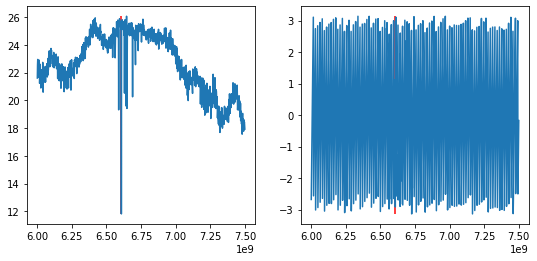

In [128]:
q_target = q1
freq = np.linspace(6,7.5,1001)*1e9 + 50e6
tag = q_target.q_name
# await measure.attinst['com8'].set_att(38)
await mrw.jpa_switch(measure,state='OFF')
# await psg_pump.setValue('Output','OFF')
await dc15.DC(-1.397)
f_lo, delta, n, f_res,base,f_s21, s_s21 = await mrw.again(q_target,measure,False,measure.f_lo,freq)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,20*np.log10(np.abs(s_s21)))
axes[0].vlines(f_lo-delta,np.max(20*np.log10(np.abs(s_s21))),np.min(20*np.log10(np.abs(s_s21))),'r')
axes[1].vlines(f_lo-delta,np.max(np.angle(s_s21)),np.min(np.angle(s_s21)),'r')
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

In [175]:
f_lo-measure.delta

array([6.70905e+09])

# 读取信号强度随时间变化

Output()

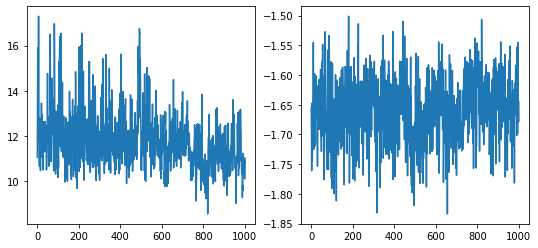

In [28]:
# await measure.attinst['com8'].set_att(20)
await psg_lo.setValue('Output','ON')
# await psg['psg_trans'].setValue('Output','ON')
#await psg[q_target.inst['ex_lo']].setValue('Frequency',f_rabi)
# await mr.jpa_switch(measure,state='OFF')
job = Job(mr.test, (measure,1001), tags=['time varing of signal'], max=1001)
f_s21, s_s21 = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,np.abs(s_s21))
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

In [96]:
np.mean(np.abs(s_s21))/np.std(s_s21)

10.166608793708301

In [15]:
%matplotlib notebook

# S21vsFlux

In [50]:
bits = [q2]
current = np.linspace(-1,1,21)
measure.readamp = [0.03]*10
measure.ringup = [150]*10
measure.ringupamp = [0.1]*10
# await measure.attinst['com8'].set_att(25)
for i in bits:
    tag = i.q_name
    print(i.inst)
    await mrw.jpa_switch(measure,'ON')
    await psg[i.inst['ex_lo']].setValue('Output','OFF')
    job = Job(mrw.S21vsFlux_awgoffset, (i,measure,current,None), tags=[tag], max=len(current))
    v_bias, f_bias, s_bias = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [363]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
current = np.linspace(-2,2,21)
measure.readamp = [0.03]*10
measure.ringup = [150]*10
measure.ringupamp = [0.1]*10
# await measure.attinst['com8'].set_att(25)
for i in bits:
    tag = i.q_name
    print(i.inst)
    await mrw.jpa_switch(measure,'ON')
    await psg[i.inst['ex_lo']].setValue('Output','OFF')
    job = Job(mrw.S21vsFlux, (i,measure,current,None), tags=[tag], max=len(current))
    v_bias, f_bias, s_bias = await job.done()
    await mrw.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

{'z_awg': 'awg132', 'z_ch': [1], 'ex_awg': 'awg134', 'ex_ch': [4, 8], 'ex_lo': 'psg_ex1', 'com': 'com3'}


Output()

AttributeError: module 'qulab.measureroutine_population' has no attribute 'InitInst'

In [ ]:
calimatrix = np.load(r'D:/QuLabData/2020/0624/crosstalk_cali/q1-q7_20200624171927.npz')['mat']
calimatrix[1:5,1:5]

In [ ]:
calimatrix = np.array([[ 1.        , -0.00614072,  0.00237171,  0.00339285,  0.01229189],
       [ 0.01965284,  1.        , -0.01015246, -0.00295805, -0.00609832],
       [ 0.01144612,  0.02177006,  1.        , -0.01671896, -0.00728347],
       [ 0.01140976,  0.02193547,  0.02581161,  1.        , -0.01872843],
       [ 0.00925843,  0.01711204,  0.01496927,  0.01558848,  1.        ]])

# S21vsPower

In [21]:
measure.readamp = [0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4]
measure.ringup = [0,0,0,0,0,0,0,0,0,100]
measure.ringupamp = [0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8]

In [105]:
q_target, att = q10, np.linspace(0.01,0.36,36)
tag = q_target.q_name
# await mrw.jpa_switch(measure,'ON')
job = Job(mrw.S21vsPower, (q_target,measure,att,'com8'), tags=[tag], max=len(att))
att_p, f_p, s_p = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(f_p[0][:,0]),np.max(f_p[0][:,0]),np.min(att_p[:,0]),np.max(att_p[:,0])]
axes[0].imshow(np.abs(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto')
axes[1].imshow(np.angle(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto')
plt.show()

# singlespce

In [16]:
calimatrix = np.load(r'D:/QuLabData/2020/1114/crosstalk_cali/zheng2_crosstalk_q1-10_20201114104601.npz')['mat']
# np.mat(calimatrix)

In [20]:
q, bias = q1, 0
q.T_bias
q.T_bias[1]-q.T_bias[0]/2
x = sy.Symbol('x')
f_com = np.float(q.specfunc.evalf(subs={x:bias}))
print(round(f_com,3),q.T_bias,q.T_bias[1]-q.T_bias[0]/2)

4.428 [3.364, -0.229, (3.36212491877869, -0.24)] -1.911


In [61]:
q = q8
q.T_bias[1]-q.T_bias[0]/2

-0.9175

In [250]:
for i in range(10):
    measure.qubits[f'q{i+1}'].readvolt = 0

In [343]:
q1.zCali = None

In [239]:
q3.replace(envelopename=['hanning',2],nwave=1,readamp=0.25,amp=1,shift=0e-9,phase=0,phaseDiff=0,timing={'z>xy':0e-9,'read>xy':0e-9},zCali=None)

In [51]:
q1.specfuncz[-1], q1.T_bias

(-0.001972372366577618, [3.345, -0.284])

In [244]:
q = q7

xvar = sy.Symbol('x',real=True)
func,voffset, vperiod, ejs, ec, d = q.specfuncz
v = np.linspace(-vperiod/2,vperiod/2,50001) + voffset
y = sy.lambdify(xvar,func,'numpy')
f_target = y(voffset-vperiod/10)*1e9
fshift = f_target - q.f_ex
bias = dt.biasshift(q.specfuncz,q.f_ex/1e9,fshift/1e9) 
q7.readvolt = bias
print(bias,f_target/1e9,fshift/1e9)

0.43580597918303265 5.318230417963526 1.0133304179635259


In [552]:
dt.specshift(q1.specfuncz,4.25,bias=-0.8,side='lower')

(3.4570267189202823, -1.3974224486736777)

In [131]:
# q4.readvolt = 0.2427778131460942 
q5.readvolt = 0

In [47]:
qubit = q3
zname, zch = [f'ch{i}' for i in qubit.inst['z_ch']], qubit.inst['z_ch']
z_awg = measure.awg[qubit.inst['z_awg']]
# pulse1 = await cww.funcarg(cww.zWave,qubit,during=2000/1e9,volt=height,shift=5000e-9,readvolt=0)
pulse3 = await cww.funcarg(cww.zWave,qubit,during=2000e-9,volt=0,shift=40000e-9)
await cww.writeWave(measure,z_awg,zname,pulse3)
await cww.couldRun(measure,z_awg,zch,zname)

In [249]:
q = q1
fc = 4.85
dt.vTophi(q.specfuncz,q.T_bias,fc)

-0.8918534000000002

In [628]:
dt.biasshift(q5.specfuncz,5.3464,-0.2965,'higher')

array(0.29225564)

In [355]:
q10.T_bias

[2.966, 0.068]

In [411]:
q_target = q1
dcstate = {}
# dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
# dcstate['q1'] = -0.9
# dcstate['q2'] = -0.179
# dcstate['q3'] = -0.076
# dcstate['q4'] = -0.213
# dcstate['q5'] = 0.08
# dcstate['q6'] = -0.068
# dcstate['q7'] = -0.232
# dcstate['q8'] = -0.667
# dcstate['q9'] = -0.76
# dcstate['q10'] = -0.302

# dcstate['q1'] = -1.2
# dcstate['q4'] = -0.52
# dcstate['q5'] = -0.52
# dcstate['q2'] = -0.6
# dcstate['q6'] = 0.1
# dcstate['q7'] = -0.52
# dcstate['q8'] = -1.2
# dcstate['q9'] = -0.9
# dcstate['q10'] = -0.7
# measure.readamp = [0.03]
# measure.ringup = [100]
# measure.ringupamp = [0.06]
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
await mrw.dcManage(measure,dcstate=dcstate,readstate=['q5'],calimatrix=calimatrix)

task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,during=0/1e9,shift=3000e-9)
mrw.concurrence(task)

# zname, zch = [f'ch{i}' for i in q_target.inst['z_ch']], q_target.inst['z_ch']
# await cww.genwaveform(measure.awg[q_target.inst['z_awg']],zname,zch)
# pulse = await cww.funcarg(cww.zWave,q_target,pi_len=10000/1e9,volt=0,shift=50000e-9)
# await cww.writeWave(measure.awg[q_target.inst['z_awg']],zname,pulse,mark=False,caliparas=q_target.zCali)
# await measure.awg[q_target.inst['z_awg']].setValue('Offset',-0.0,ch=zch[0])
# await cww.couldRun(measure.awg[q_target.inst['z_awg']])

Output()

[(4.734221143347289, 1.4158780977841616)]


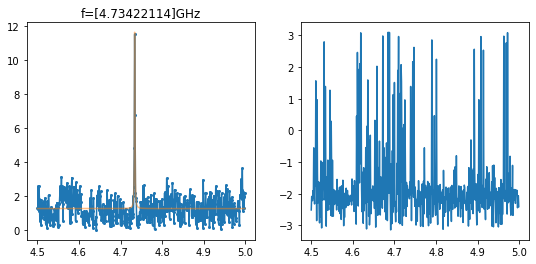

In [358]:
# tag, freq = q_target.q_name, np.arange(-200,201,1)*1e6+round(f_com,3)*1e9
freq = np.arange(4.5,5,0.001)*1e9
await psg_trans.setValue('Power',5)
# await measure.attinst['com9'].set_att(30)
# await cw.modulation_ex(q_target,measure)
await mrw.jpa_switch(measure,'ON')
job = Job(mrw.singlespec, (q_target,measure,freq,True,measure.f_lo,True), tags=(measure.qubitToread), max=len(freq))
f_ss, s_ss = await job.done()
state = await cww.QueryInst(measure)
index = np.abs(s_ss).argmax(axis=0)
x,y,z,band, peak= f_ss/1e9, s_ss,[],[], []
f_rabi = np.array([x[:,i][j] for i, j in enumerate(index)])
for i in range(np.shape(s_ss)[1]):
    res, e = op.Lorentz_Fit().fitLorentz(x[:,i],np.abs(y[:,i]))
    index, prominences, widths = op.RowToRipe().findPeaks(np.abs(y[:,i]))
    a,b,c,d = res.x
    z.append(a/(1.0+c*(x[:,i]-b)**2)+d)
    band.append((b,e))
    peak.append([x[:,i][index],np.abs(y[:,i])[index]])
z = np.array(z).T

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(x,np.abs(y),'-o',markersize=2)
axes[0].plot(x,z,alpha=0.5)
# axes[0].plot(np.array(peak)[:,0],np.array(peak)[:,1],'-o',alpha=0.5)
axes[0].set_title(f'f={np.array(band)[:,0]}GHz')
print(band)
axes[1].plot(x,np.angle(y))
plt.show()

In [250]:
q10.zCali = None

In [286]:
f_rabi

array([5.649])

In [13]:
for i in range(10):
    globals()[f'q{i+1}'].replace(f_ex=f_rabi[i]*1e9,state=[state,measure.delta,measure.base,measure.readlen])

In [46]:
(4.379-4.274)*2

0.20999999999999908

In [23]:
q3.f_ex

4379000000.0

In [359]:
# q3.replace(f_ex=4.2537e9,state=[state,measure.delta,measure.base,measure.readlen])
q10.replace(f_ex=4.734e9,state=[state,measure.delta,measure.base,measure.readlen])

In [288]:
q1.replace(f_ex=4.8654e9,alpha=204e6)
q2.replace(f_ex=5.649e9,alpha=246e6)
q3.replace(f_ex=5.283e9,alpha=201e6)
q4.replace(f_ex=4.781e9,alpha=260e6)
q5.replace(f_ex=5.123e9,alpha=216e6)
q6.replace(f_ex=5.395e9,alpha=202e6)
q7.replace(f_ex=4.93e9,alpha=256e6)
q8.replace(f_ex=5.711e9,alpha=246e6)
q9.replace(f_ex=4.738e9,alpha=206e6)
q10.replace(f_ex=5.491e9,alpha=252e6)
# q1.replace(f_ex=4.527e9,alpha=208e6,state=[state,measure.delta,measure.base,measure.readlen])
# pd.DataFrame(state)

,q8,q6,q3,q5,q4,q9,q2,q7,jpa,q10,...,psg_lo,psg_ex1,psg_trans,psg_pump,awg131,awg132,awg133,awg134,awgread,awg_trig
ch1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
error,+0,+0,+0,+0,+0,+0,+0,+0,+0,+0,...,0,0,0,0,-220,0,0,0,0,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.612950GHz,4.537998GHz,5.799000GHz,13.502000GHz,NaN,NaN,NaN,NaN,NaN,NaN


In [620]:
q6.replace(f_ex=5.3464e9,alpha=212e6,state=[state,measure.delta,measure.base,measure.readlen])
q7.replace(f_ex=5.0499e9,state=[state,measure.delta,measure.base,measure.readlen])
pd.DataFrame(state)

,q8,q6,q3,q5,q4,q9,q2,q7,jpa,q10,...,psg_lo,psg_ex1,psg_trans,psg_pump,awg131,awg132,awg133,awg134,awgread,awg_trig
ch1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
error,+0,+0,+0,+0,+0,+0,+0,+0,+0,+0,...,0,0,0,0,-220,0,0,0,0,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.645300GHz,4.551600GHz,5.399000GHz,13.502000GHz,NaN,NaN,NaN,NaN,NaN,NaN


## 单条谱扫电压

Output()

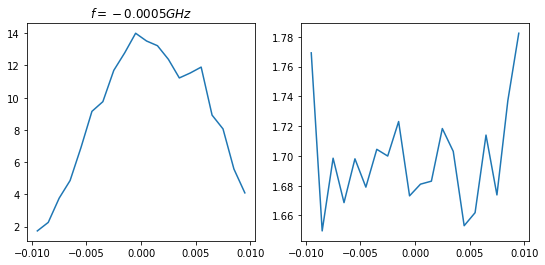

In [255]:
tag, ftarget, biaslist = 'q3', 4.1423e9, np.arange(-0.01,0.01,0.001) + (0.95)

# await psg_trans.setValue('Power',13)
# mr.Att_Setup(measure,'com8').Att(28)
# await cw.modulation_ex(q_target,measure)
# # await psg_ex1.setValue('Moutput','OFF')
# await mr.jpa_switch(measure,'ON')
job = Job(mrw.specbias, (q3,measure,ftarget,biaslist,True), tags=[tag], max=len(biaslist))
v_sb, s_sb = await job.done()
index = np.abs(s_sb).argmax(axis=0)
v_rabi = np.array([v_sb[:,i][j] for i, j in enumerate(index)])
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(v_sb,np.abs(s_sb))
axes[0].set_title('$f=%.4fGHz$'%(v_rabi[0]))
axes[1].plot(v_sb,np.angle(s_sb))
plt.show()

In [245]:
qubit = q3
ex_name, exch = [f'ch{i}' for i in qubit.inst['ex_ch']], qubit.inst['ex_ch']
ex_awg = measure.awg[qubit.inst['ex_awg']]
task = await mrw.executeEXwave(measure,cww.rabiWave,exstate=['q3'],shift=600e-9)
mrw.concurrence(task)

In [248]:
q3.zCali

{'1st': {'pexp': array([ 2.21691620e+00,  2.77089710e+00, -4.50326965e-09, -9.24067969e-03,
          2.30225003e-03]),
  'ppoly': array([-2.20237490e+02,  1.80805398e-01,  7.63766682e-15, -2.34847646e-12,
          2.91690981e-10, -1.89233812e-08,  7.02319784e-07, -1.54825261e-05,
          2.05566740e-04, -1.60743532e-03,  6.78595948e-03, -1.17474398e-02]),
  'time': [100, 0, 6.5, 0.4]},
 '2nd': {}}

In [262]:
q3.zCali ={'1st': {'pexp': np.array([ 2.21691620e+00,  2.77089710e+00, -4.50326965e-09, -9.24067969e-03,
          2.30225003e-03]),
  'ppoly': np.array([-2.20237490e+02,  1.80805398e-01,  7.63766682e-15, -2.34847646e-12,
          2.91690981e-10, -1.89233812e-08,  7.02319784e-07, -1.54825261e-05,
          2.05566740e-04, -1.60743532e-03,  6.78595948e-03, -1.17474398e-02]),
  'time': [100, 0, 6.5, 0.4]},
 '2nd': {}}

# 功率拉比

In [142]:
q1.replace(envelopename=['hanning',1],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=300e6,pi_len=20e-9,\
         seqtype='PDD',detune=3e6)

In [84]:
q2.timing['read>xy'] = 3400e-9

Output()

(9.27048994640673, 7.497972357039413, 18056.26285332503, 0.9803921568627451, 0)


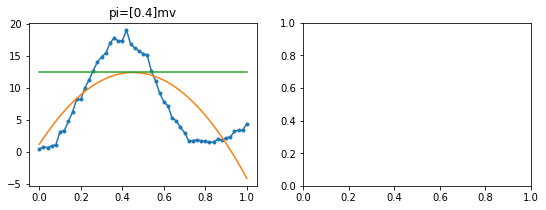

In [64]:
q_target = ['q1']
amp = np.linspace(0,1,51)
await awg100.write('TRIG:SOUR %s'%'INT') 
arg = 'pi_len' if np.max(amp)>1 else 'amp'
job = Job(mrw.rabi, (measure,amp,arg,q_target), tags=q_target, max=len(amp))
v_rp, s_rp = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op = []
for i in range(np.shape(s_rp)[1]):
    x, y = v_rp[:,i], np.abs(s_rp[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
    axes[0].set_title(f'pi={t_op}mv')
plt.show()

In [63]:
q2.amp = 0.3

## Rabi_seq

In [575]:
q3.replace(envelopename=['hanning',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=300e6,pi_len=30e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=3e6,DRAGScaling=None,timing={'z>xy':0e-9,'read>xy':0e-9})

In [134]:
q10.timing['read>xy'] = 0e-9

In [363]:
q10.replace(envelopename=['hanning',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=-300e6,pi_len=20e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=3e6,DRAGScaling=None)

Output()

(13.519139008103535, 14.494036291064637, 20000, 0.9900990099009901, 0)
[0.4] [0.5540638862235593]


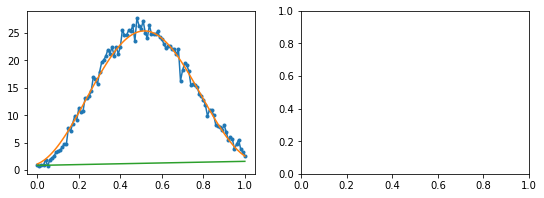

In [364]:
q_target = ['q10']
amp = np.linspace(0,1,101)
arg = 'amp'
comwave, readseq, mode = True, True, 'vbroadcast' 
numrepeat, avg, measure.repeat = (len(amp),False,1000) if mode == 'hbroadcast' else (300,True,len(amp))
job = Job(mrw.rabi_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
v_rp, s_rp = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op, t_fit = [], []
for i in range(np.shape(s_rp)[1]):
    x, y = v_rp[:,i], np.abs(s_rp[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    t_fit.append(1/w/2)
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
#     axes[0].set_title(f't_op={t_op}mv,pi={t_fit}mv')
print(t_op,t_fit)
plt.show()

In [365]:
# q9.amp = 0.27
# q8.amp = 0.3613
# q7.amp = 0.66453
q10.amp = 0.5541
# q4.amp = 0.37
# q5.amp = 0.405
# q1.amp = 0.41816
# q2.amp = 0.3279
# q3.amp = 0.29
# q6.amp = 0.39

## 2态拉比

In [70]:
q2.replace(envelopename=['hanning',2],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=-100e6,pi_len=10e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=3e6,DRAGScaling=None,timing={'z>xy':0e-9,'read>xy':0e-9})

Output()

(6.9120570605464255, 23.81015258358814, 20000, 5.9405940594059405, 0)
[0.09] [0.1022155702565451]


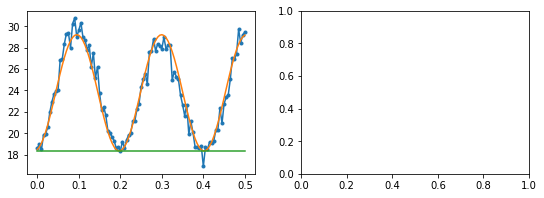

In [72]:
q_target = ['q2']
amp = np.linspace(0,0.5,101)
arg = 'amp'
comwave, readseq, mode = True, True, 'vbroadcast'

numrepeat, avg, measure.repeat = (len(amp),False,500) if mode == 'hbroadcast' else (300,True,500)
job = Job(mrw.rabi2_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
v_rp, s_rp = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op, t_fit = [], []
for i in range(np.shape(s_rp)[1]):
    x, y = v_rp[:,i], np.abs(s_rp[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    t_fit.append(1/w/2)
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
#     axes[0].set_title(f't_op={t_op}mv,pi={t_fit}mv')
print(t_op,t_fit)
plt.show()

In [73]:
q2.amp2 = 0.10222

# IQ-Mixer 线性度

In [323]:
q_target = q10
amp = np.linspace(0.1,1,10)
t_rabi = np.linspace(1,201,101)
job = Job(mrw.lineIQMixer, (measure,amp,t_rabi,[q_target.q_name],'vbroadcast'), tags=[tag], max=len(amp))
v_pi, t_pi, s_pi = await job.done()

Output()

# 优化Pi脉冲

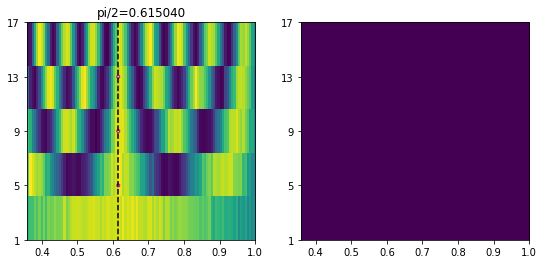

In [227]:
# q_target, nwave, wavlen = q7, 5, 101
# tag = q_target.q_name
# optwhich = 'amp'
# job = Job(mrw.pipulseOpt, (measure,nwave,wavlen,optwhich,[q_target.q_name],'vbroadcast'), tags=[tag], max=nwave)
# n_pi, t_pi, s_pi = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
x, y, s = n_pi[:,0],t_pi[0][:,0], np.abs(s_pi[:,:,0])
index = y[np.argmax(np.abs(s),axis=1)[0]]
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].set_yticks(x)
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
yop = np.array([op.RowToRipe().firstMax(y,z,num=0.6,peakpercent=0.9,insitu=True) for z in s])
axes[0].scatter(yop[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
axes[0].vlines(np.mean(yop),np.max(x),np.min(x),'k','--')
axes[0].set_title('pi/2=%f'%np.mean(yop))
axes[1].set_yticks(x)
axes[1].imshow(np.angle(s),extent=extent,origin='lower',aspect='auto')
plt.show()

In [447]:
q5.amp

0.85006

In [228]:
# q10.amp = 0.456768
# q9.amp = 0.7088
# q8.amp = 0.77484
# q2.amp = 0.37262
# q1.amp = 0.535574
# q3.amp = 0.3861
q7.amp = 0.615
# q4.amp = 0.48804
# q5.amp = 0.42282
# q6.amp = 0.45864

# AllXY dragdetune

Output()

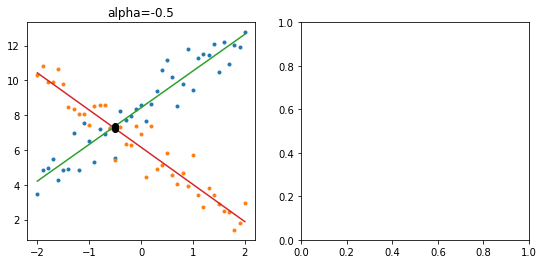

In [229]:
q_target = q7
which = 0
#alpha = q_target.alpha
#await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))
job = Job(mrw.AllXYdragdetune, (measure,which,[q_target.q_name]), tags=[q_target.q_name], max=82)
fall, sall = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
l = np.shape(fall)[0]//2
f1, f2, s1, s2 = fall[:l,0], fall[l:,0], np.abs(sall[:l,0]), np.abs(sall[l:,0])
z1 = np.poly1d(np.polyfit(f1,s1,1))(f1)
z2 = np.poly1d(np.polyfit(f2,s2,1))(f2)
index = np.argmin(np.abs(z1-z2))
axes[0].plot(np.array([f1,f2]).T,np.array([s1,s2]).T,'.')
axes[0].plot(np.array([f1,f2]).T,np.array([z1,z2]).T)
# axes[0].plot(fall[l:,:],np.abs(sall[l:,:]))
axes[0].plot([f1[index],f2[index]],[z1[index],z2[index]],'ko')
axes[0].set_title(f'alpha={round(f1[index],3)}')
plt.show()

In [230]:
# q9.DRAGScaling = -0/(q9.alpha*2*np.pi)
# q2.DRAGScaling = -0.4/(q2.alpha*2*np.pi)
# q1.DRAGScaling = -0.1/(q1.alpha*2*np.pi)
# q3.DRAGScaling = -0.4/(q3.alpha*2*np.pi)
# q8.DRAGScaling = 0.5/(q8.alpha*2*np.pi)
q7.DRAGScaling = -0.5/(q7.alpha*2*np.pi)
# q4.DRAGScaling = 0/(q4.alpha*2*np.pi)
# q5.DRAGScaling = -1/(q5.alpha*2*np.pi)

# 优化失谐

In [274]:
q_target = q7
job = Job(mrw.optPidetune, (measure,[q_target.q_name]), tags=[q_target.q_name], max=101)
f, pop = await job.done()

Output()

In [275]:
index = np.argmax(pop[:,0])
f[index,0]

4267100000.0

In [276]:
q7.f_ex = f[index,0]

# AC_Stark

In [53]:
#波形尾部在 87 us处， 波形宽度为 50 ns
q1.replace(envelopename=['hanning',2],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=110e6,pi_len=5.6e-9,\
         seqtype='PDD',detune=3e6)

In [199]:
q1.timing["read>xy"]=10e-9

## 单条

In [366]:
q10.timing = {'read>xy':0,'z>xy':0}

Output()

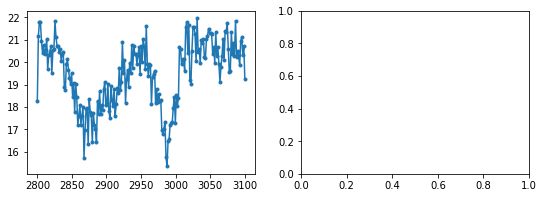

In [537]:
q_target = q6
t_rabi = np.linspace(2800,3100,201)
power = 0.2
tag = q_target.q_name
job = Job(mrw.singleacStark, (measure,t_rabi,power,[q_target.q_name]), tags=[tag], no_bar=True)
t_shift, s_ac = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
for i in range(np.shape(s_ac)[1]):
    x, y = t_shift[:,i], np.abs(s_ac[:,i])
    axes[0].plot(x,y,'-o',markersize=3)
plt.show()

In [538]:
2988-3050

-62

In [329]:
q1.timing['read>xy'] = -62e-9 + 150e-9
q2.timing['read>xy'] = -80e-9 + 150e-9
q3.timing['read>xy'] = -75e-9 + 150e-9
q4.timing['read>xy'] = -62e-9 + 150e-9
q5.timing['read>xy'] = -76e-9 + 150e-9
q6.timing['read>xy'] = -62e-9 + 150e-9
q7.timing['read>xy'] = -50e-9 + 300e-9
q8.timing['read>xy'] = -62e-9 + 150e-9
q9.timing['read>xy'] = -58e-9 + 300e-9
q10.timing['read>xy'] = -67e-9 + 300e-9

## 二维

In [210]:
q1.f_ex = 4.643e9

In [129]:
q_target = q2
t_rabi = np.linspace(2000,5000,201)
power = 0.2
tag = q_target.q_name
job = Job(mrw.acStark, (measure,t_rabi,power,[q_target.q_name]), tags=[tag],max=51)
freq, t_shift, s_ac = await job.done()

Output()

TypeError: cannot unpack non-iterable NoneType object

# 腔内光子数

In [30]:
q2.f_ex = 4811430000.0

In [171]:
q_target = q2
power = np.linspace(0,0.1,101)
end = 3000
tag = q_target.q_name
job = Job(mrw.photonNum, (measure,power,end,[q_target.q_name]), tags=[tag],max=51)
freq, t_shift, s_ac = await job.done()

Output()

# Z脉冲

## 单条

In [35]:
#波形尾部在 87 us处， 波形宽度为 30ns, 最低点应为3015

In [357]:
measure.qubits['q1'].zCali = None

In [302]:
q8.timing['z>xy']  

0

Output()

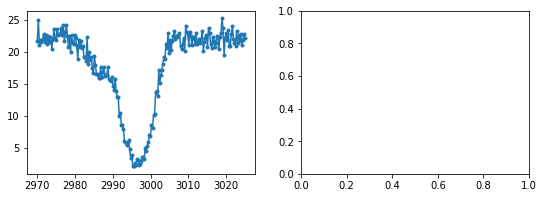

In [367]:
q_target = q10
t_rabi = np.linspace(2970,3025,201)
att_single = 30
tag = q_target.q_name
job = Job(mrw.singleZpulse, (measure,t_rabi,[q_target.q_name]), tags=[tag],no_bar=True)
t_shift, s_z = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
for i in range(np.shape(s_z)[1]):
    x, y = t_shift[:,i], np.abs(s_z[:,i])
    axes[0].plot(x,y,'-o',markersize=3)
plt.show()

In [368]:
2996-3005+(q_target.pi_len*q_target.envelopename[1])/2e-9

1.0

In [369]:
q1.timing['z>xy'] = -8e-9 
q2.timing['z>xy'] = -3e-9 
# q3.timing['z>xy'] = 7e-9 
q3.timing['z>xy'] = -3e-9 
q4.timing['z>xy'] = 11e-9 
q5.timing['z>xy'] = 3e-9 
q6.timing['z>xy'] = 9e-9 
q7.timing['z>xy'] = 0e-9 
q8.timing['z>xy'] = 12e-9 
q9.timing['z>xy'] = 9e-9 
q10.timing['z>xy'] = 1e-9 

## 二维

In [97]:
q_target = q2
t_rabi = np.linspace(2895,2985,201)
att_single = 30
tag = q_target.q_name
# await psg[q_target.inst['ex_lo']].setValuez('Frequency',(q_target.f_ex+q_target.delta_ex))
job = Job(mrw.zPulse, (measure,t_rabi,[q_target.q_name]), tags=[tag],max=40)
freq, t_shift, s_z = await job.done()

Output()

## 二维Population

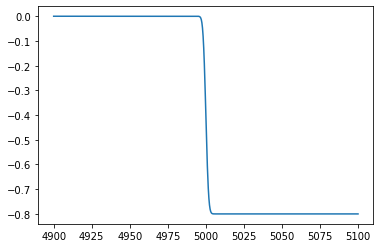

In [694]:
t = np.linspace(4900,5100,1001)
func_test = lambda t: -(scipy.special.erf((t-5000)/2)+1)/2*0.8
plt.figure()
plt.plot(t,func_test(t))

In [118]:
measure.qubits['q3'].zCali 

{'1st': {'pexp': array([ 0.00086055,  0.02448261,  0.00178397, -0.0416874 ,  0.00110123,
          0.11770469,  0.00178326, -0.14322716,  0.00289919, -0.1570217 ,
          0.00289909,  0.20142228,  0.00448228,  0.22252878,  0.00448216,
         -0.24795941,  0.00680571, -0.26586727,  0.00680584,  0.12494174,
          0.00965851,  0.14696199,  0.00965886,  0.16209001,  0.00965913,
          0.11677317,  0.00965846, -0.12729199,  0.01193812, -0.15730264,
          0.0119373 ]),
  'ppoly': array([-1.14299840e+02,  2.89198466e-01, -4.86480462e-12,  1.01669259e-09,
         -8.74959767e-08,  4.06000472e-06, -1.12123142e-04,  1.92125793e-03,
         -2.05483707e-02,  1.32941325e-01, -4.74303475e-01,  7.14094095e-01]),
  'time': [60, 0, 6.5, 0.4]},
 '2nd': {}}

In [51]:
q_target = q3
t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 
t_rabi = np.append(np.arange(2900,4900,50),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,1)))
# t_rabi = np.arange(4986,5005,2)
# t_rabi = np.append(np.append(np.arange(2000,4900,50),np.arange(4900,4940,5)),np.arange(4940,t_end,1))
height = 0.4
tag = q_target.q_name
# await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
job = Job(mrw.zPulse_pop, (measure,t_rabi,height,[q_target.q_name]), tags=[tag,str(height)],max=len(t_rabi))
freq, t_shift, s_z = await job.done()

Output()

TypeError: cannot unpack non-iterable NoneType object

In [304]:
len(t_rabi)

78

In [311]:
np.max([1,1,1,2,2])

2

In [119]:
np.array(np.mat(measure.readmatrix['q7']).I*np.mat([1,0.5]).T)

array([[0.99138293],
       [0.50861707]])

In [125]:
np.array([[1,2],[3,4]])[:,1]

array([2, 4])

In [ ]:
bits = [q1,q3]
for i in bits:
    q_target = i
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},output=True,during=0/1e9,shift=0e-9)
    task_ex = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[q_target.q_name],output=True)
    mrw.concurrence([{**task[0],**task_ex[0]},{**task[1],**task_ex[1]}])
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
    measure.qubitToread = [q_target.q_name]
    measure.readamp = q_target.readamp
    measure.ringup = q_target.ringup
    measure.ringupamp = q_target.ringupamp
    pulse = await cww.modulation_read(measure,measure.delta,readlen=1200,weight=q_target.weight)

    t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 + 10
    # t_rabi = np.append(np.arange(2000,4900,40),np.arange(4940,t_end,2))
    # t_rabi = np.arange(4986,5005,2)
    t_rabi = np.append(np.append(np.arange(2000,4900,50),np.arange(4900,4940,5)),np.arange(4940,t_end,1))
    height = -0.8
    tag = q_target.q_name
    await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
    job = Job(mrw.zPulse_pop, (measure,t_rabi,height,[q_target.q_name]), tags=[tag,str(height)],max=len(t_rabi))
    freq, t_shift, s_z = await job.done()
    clear_output()

Output()

In [189]:
q4.asdict()

{'q_name': 'q4',
 'inst': {'z_awg': 'awg132',
  'z_ch': [6],
  'ex_awg': 'awg133',
  'ex_ch': [4, 8],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.674, 0.19],
 'T_z': [1.693, 0.128],
 'specinterp': [array([4.18522651, 4.18523392, 4.18524133, ..., 5.0963504 , 5.09635058,
         5.09635076]),
  array([-4.40000000e-01, -4.39998240e-01, -4.39996480e-01, ...,
         -3.52001408e-06, -1.76000704e-06,  0.00000000e+00])],
 'specfunc': 0.392922207235296*(0.260687322777235*tan(1.16146693007348*x - 0.195126444252345)**2 + 1)**(1/4)*sqrt(Abs(cos(1.16146693007348*x - 0.195126444252345))) - 0.207651457817498,
 'specfuncz': [5.23649435077076*(2.44129621681596e-5*tan(1.81602720319208*x - 0.0211271599327831)**2 + 1)**(1/4)*sqrt(Abs(cos(1.81602720319208*x - 0.0211271599327831))) - 0.139559260563361,
  0.01163372437133506,
  1.7299259879299895,
  24.560241447758198,
  0.13955926056336138,
  -0.004940947497004958],
 'specfunc_cavity': sqrt((0.392922207235296*(0.260687322777235*tan(1.161466930

In [190]:
measure.qubits["q4"].asdict()

{'q_name': 'q4',
 'inst': {'z_awg': 'awg132',
  'z_ch': [6],
  'ex_awg': 'awg133',
  'ex_ch': [4, 8],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.674, 0.19],
 'T_z': [1.693, 0.128],
 'specinterp': [array([4.18522651, 4.18523392, 4.18524133, ..., 5.0963504 , 5.09635058,
         5.09635076]),
  array([-4.40000000e-01, -4.39998240e-01, -4.39996480e-01, ...,
         -3.52001408e-06, -1.76000704e-06,  0.00000000e+00])],
 'specfunc': 0.392922207235296*(0.260687322777235*tan(1.16146693007348*x - 0.195126444252345)**2 + 1)**(1/4)*sqrt(Abs(cos(1.16146693007348*x - 0.195126444252345))) - 0.207651457817498,
 'specfuncz': [5.23649435077076*(2.44129621681596e-5*tan(1.81602720319208*x - 0.0211271599327831)**2 + 1)**(1/4)*sqrt(Abs(cos(1.81602720319208*x - 0.0211271599327831))) - 0.139559260563361,
  0.01163372437133506,
  1.7299259879299895,
  24.560241447758198,
  0.13955926056336138,
  -0.004940947497004958],
 'specfunc_cavity': sqrt((0.392922207235296*(0.260687322777235*tan(1.161466930

### sequence

In [167]:
# q_target = q3
# t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 +1
# t_rabi = np.append(np.arange(2200,4900,50),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,1)))
# # t_rabi = np.append(np.arange(4790,4940,1.2),np.arange(4940,t_end,0.4))
# np.shape(t_rabi)
# # volt = np.append(np.linspace(-0.02,0.02,81),np.linspace(0.02,0.06,21))
# volt = np.linspace(-0.02,0.03,61)
# height = -0.4
# tag = q_target.q_name
# # await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
# job = Job(mrw.zPulse_pop, (measure,t_rabi,volt,height,[q_target.q_name]), tags=[tag,str(height)],max=len(volt))
# freq, t_shift, s_z = await job.done()

In [169]:
t_rabi = np.append(np.arange(1800,4900,30),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,0.4)))
np.shape(t_rabi)

(252,)

In [168]:
q5.zCali 

{'1st': {'pexp': array([ 0.        , -0.0075575 ,  0.0022273 , -0.08730499,  0.03367004]),
  'ppoly': array([ 1.66217950e+03,  1.49992693e-01,  1.73231351e-38,  1.42395540e-37,
         -2.40754529e-34,  2.23310247e-35,  8.44454631e-31,  3.28997985e-29,
         -1.19772993e-27, -1.66046714e-25, -4.87503045e-24,  3.83000842e-22,
          3.04259150e-20, -2.95377616e-19, -8.79206271e-17, -8.45677416e-16,
          2.39452580e-13, -2.13229839e-12, -3.26329343e-10,  1.32691629e-08,
         -2.32161746e-07,  2.12926746e-06, -1.00312760e-05,  2.26703498e-05,
         -2.51236048e-05,  5.37285665e-06]),
  'time': [55, 0, 0.40000000004511094, 0.4]},
 '2nd': {}}

In [400]:
q10.zCali

In [406]:
bits = [q8,q7,q10]
for i in bits:
    q_target = i
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},output=True,during=0/1e9,shift=0e-9)
    task_ex = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[q_target.q_name],output=True)
    mrw.concurrence([{**task[0],**task_ex[0]},{**task[1],**task_ex[1]}])
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
    measure.qubitToread = [q_target.q_name]
    measure.readamp = q_target.readamp
    measure.ringup = q_target.ringup
    measure.ringupamp = q_target.ringupamp
    pulse = await cww.modulation_read(measure,measure.delta,readlen=1200,weight=q_target.weight)

    t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 +1
    t_rabi = np.append(np.arange(1800,4900,30),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,0.4)))
#     t_rabi = np.append(np.arange(4790,4940,1.2),np.arange(4940,t_end,0.4))
    
#     volt = np.append(np.linspace(-0.02,0.02,81),np.linspace(0.02,0.06,21))
    volt = np.linspace(-0.04,0.01,71)
#     volt = np.linspace(-0.02,0.01,41)
    height = 0.4
    tag = q_target.q_name
    # await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
    job = Job(mrw.zPulse_pop, (measure,t_rabi,volt,height,[q_target.q_name]), tags=[tag,str(height)],max=len(volt))
    freq, t_shift, s_z = await job.done()
    clear_output()

In [124]:
t_rabi = np.append(np.arange(4790,4940,1.2),np.arange(4940,4991,0.4))
np.shape(t_rabi)

(253,)

# T1

In [55]:
q6.pi_len = 16e-9

Output()

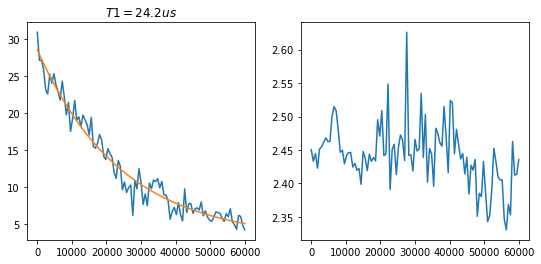

In [56]:
t_T1, q_target = np.linspace(0,60000,101,endpoint=True), ['q6']
job = Job(mrw.rabi, (measure,t_T1,'shift',q_target), tags=q_target, max=len(t_T1))
t_t, s_t = await job.done()
A, B, T1 = op.Exp_Fit().fitExp(t_t[:,0],np.abs(s_t[:,0]))
z = A * np.exp(-t_t[:,0]*T1) + B
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_t,np.abs(s_t))
axes[0].plot(t_t[:,0],z)
axes[0].set_title('$T1=%.1fus$'%(1/T1/1000))
axes[1].plot(t_t,np.angle(s_t))
plt.show()

# T1_seq

In [139]:
q1.replace(pi_len=10.6e-9)

In [114]:
q10.timing['read>xy'] = 100e-9

In [343]:
q_target = ['q1']
amp = np.linspace(0,14000,101)
arg = 'shift'
comwave, readseq, mode = True, True, 'vbroadcast'

numrepeat, avg, measure.repeat = (len(amp),False,500) if mode == 'hbroadcast' else (300,True,len(amp))
job = Job(mrw.rabi_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
t_t, s_t = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
A, B, T1 = op.Exp_Fit().fitExp(t_t[:,0],np.abs(s_t[:,0]))
z = A * np.exp(-t_t[:,0]*T1) + B
axes[0].plot(t_t,np.abs(s_t))
axes[0].plot(t_t[:,0],z)
axes[0].set_title('$T1=%.1fus$'%(1/T1/1000))
axes[1].plot(t_t,np.angle(s_t))
plt.show()

Output()

TypeError: cannot unpack non-iterable NoneType object

# Ramsey

In [69]:
q1.replace(nwave=0,seqtype='PDD',detune=2e6)

Output()

(27.678096420331716, -69.25510484251407, 30000, 26397.890093965696, 0.0015841584158415843, 0)


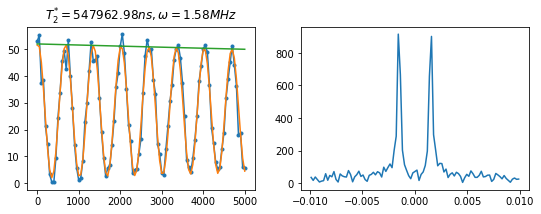

In [112]:
t_Ramsey, q_target = np.linspace(0,5000,101), ['q2']
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))

job = Job(mrw.Ramsey, (measure,t_Ramsey,q_target), tags=q_target, max=len(t_Ramsey))
t_ram, s_ram = await job.done()
x, y = t_ram[:,0], (s_ram[:,0])
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

In [194]:
f = await  psg_ex1.getValue('Frequency')
await psg_ex1.setValue('Frequency',(f-w*1e9+2e6))
print(f)

4943000000.0


In [195]:
q1.f_ex = f - q1.delta_ex

In [113]:
q1.asdict()

{'q_name': 'q1',
 'inst': {'z_awg': 'awg132',
  'z_ch': [1],
  'ex_awg': 'awg134',
  'ex_ch': [4, 8],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [3.319, -0.284],
 'T_z': [2.101, -0.194],
 'specfunc': 5.25149015598707*(0.942356245310643*tan(0.934656305237647*x + 0.218709575425609)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934656305237647*x + 0.218709575425609))) - 0.81966338969257,
 'specfunc_cavity': sqrt((5.25149015598707*(0.942356245310643*tan(0.934656305237647*x + 0.218709575425609)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934656305237647*x + 0.218709575425609))) - 7.33303642022885)**2 + 0.268557160758026)/2 + 2.62574507799353*(0.942356245310643*tan(0.934656305237647*x + 0.218709575425609)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934656305237647*x + 0.218709575425609))) + 2.84685482042185,
 'photonnum_func': None,
 'bias': 0,
 'zpulse': None,
 'f_lo': array([6.535e+09]),
 'delta': array([50000000.]),
 'f_ex': 5308400000.0,
 'delta_ex': 300000000.0,
 'alpha': 212000000.0,
 'power_ex': 60,
 'power_rabi': 30,
 

# ramsey_seq

In [163]:
q5.replace(nwave=0,seqtype='PDD',detune=2e6)
# await cww.clearSeq(measure,['awg133','awg134'])

Output()

(13.737858575504145, 20.159046658450684, 30000, 4078.7134725832907, 0.001782178217821782, 0)


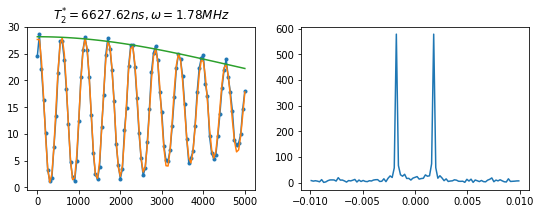

In [164]:
q_target = ['q5']
t_Ramsey = np.linspace(0,5000,101)
att_single = 30
comwave, readseq, mode = True, True, 'vbroadcast'

numrepeat, avg = (len(t_Ramsey),False) if mode == 'hbroadcast' else (300,True)
job = Job(mrw.Ramsey_seq, (measure,t_Ramsey,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
t_ram, s_ram = await job.done()
x, y = t_ram[:,0], (s_ram[:,0])
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

In [165]:
f = await  psg['psg_ex1'].getValue('Frequency')
await psg['psg_ex1'].setValue('Frequency',(f-w*1e9+2e6))
print(f)

4785900000.0


In [158]:
q2.f_ex

4811430000.0

In [166]:
q5.f_ex = f-w*1e6+2e6 - q5.delta_ex

# SpinEcho

In [47]:
q6.replace(nwave=1,seqtype='CPMG',detune=1e6)

In [36]:
t_spin, q_target = np.linspace(0,15000,101), ['q6']

job = Job(mrw.SpinEcho, (measure,t_spin,q_target), tags=q_target, max=len(t_spin))
t_sp, s_sp = await job.done()
x, y = t_sp[:,0], s_sp[:,0]
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=100000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(x,np.abs(y),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}=%.2fus,w=%fMHz$'%(np.abs(T2/1000),w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

Output()

TypeError: cannot unpack non-iterable NoneType object

# SpinEcho_seq

In [73]:
q10.replace(nwave=1,seqtype='CPMG',detune=1e6)

Output()

(9.157542566974767, 8.543204781254092, 50000, 9467.04738466723, 0.0009950248756218905, 0)


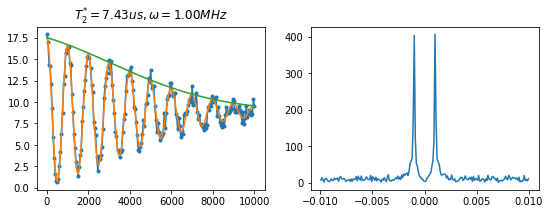

In [74]:
t_spin, q_target = np.linspace(0,10000,201), ['q10']
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))

job = Job(mrw.SpinEcho_seq, (measure,t_spin,q_target,True), tags=q_target, max=500, avg=True)
t_sp, s_sp = await job.done()
x, y = t_sp[:,0], (s_sp[:,0])
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=50000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(x,np.abs(y),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fus,\omega=%.2fMHz$'%(T2/1e3,w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

In [111]:
np.shape(t_sp)

(201, 1)

# Spec2d_awg

In [183]:
q1.replace(envelopename=['square',1],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=120e6,pi_len=23e-9,\
         seqtype='CPMG',detune=3e6)

In [121]:
freq = np.arange(3.7,4.7,0.001)*1e9
bits = [q1]
await psg_trans.setValue('Power',0)
# await measure.attinst['com8'].set_att(20)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
    await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,freq,None), tags=[i.q_name], max=61)
    v_s2, f_s2, s_s2 = await job.done()

q1


Output()

TypeError: cannot unpack non-iterable NoneType object

# OPTweight

In [372]:
q_target = ['q10']
job = Job(mrw.readOpweight, (measure,q_target), tags=q_target, max=2)
ampop= await job.done()
amp_off, amp_on = ampop[0][0,:], ampop[0][1,:]
ampdiff = np.abs(amp_on-amp_off)
weight = (ampdiff/np.mean(ampdiff))
# weight /= np.max(np.abs(weight))
measure.qubits[q_target[0]].weight = weight
plt.figure()
# plt.plot(np.abs(amp_off))
# plt.plot(np.abs(amp_on))
# plt.plot(ampdiff)
plt.plot(weight)

Output()

# 优化读出点

In [331]:
q10.timing

{'z>xy': -1e-08, 'read>xy': 3.044e-06}

Output()

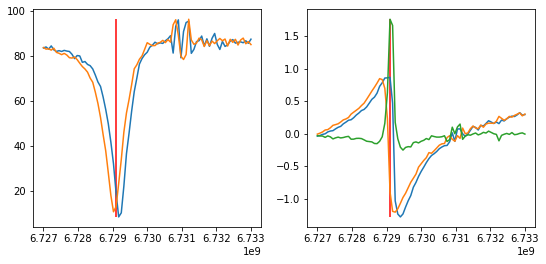

In [371]:
q_target = ['q10']
# await measure.attinst['com8'].set_att(30)
# await measure.attinst[q_target.inst['com']].set_att(q_target.power_rabi)
await mrw.jpa_switch(measure,state='ON')
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))
job = Job(mrw.readOp, (measure,q_target), tags=q_target, max=2)
st, f_op, s_op= await job.done()
f_lo = []
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
for i in range(measure.n):
    f, s_off, s_on = f_op[:,:,i][0], s_op[:,:,i][0], s_op[:,:,i][1]
    f_lo1 = (f[np.argmin(np.abs(s_off))] + f[np.argmin(np.abs(s_on))])/2
    x_off, y_off = op.RowToRipe().deductPhase(f,s_off)
    x_on, y_on = op.RowToRipe().deductPhase(f,s_on)
    anglediff = (np.angle(y_off[0])-np.angle(y_on[0]))
    index = np.abs(anglediff).argmax(axis=0)
    #index = np.abs(s_off).argmin(axis=0)
    f_lo.append(f[index] if np.abs(f[index]-f_lo1)<0.1e6 else f_lo1)
    axes[0].plot(f_op[:,:,i].T,np.abs(s_op[:,:,i].T))
    axes[0].vlines(f_lo,np.max(np.abs(s_op[:,:,i].T)),np.min(np.abs(s_op[:,:,i].T)),'r')
    axes[1].plot(x_off,np.angle(y_off[0]))
    axes[1].plot(x_on,np.angle(y_on[0]))
    axes[1].plot(x_off,anglediff)
    axes[1].vlines(f_lo,np.max(anglediff),np.min(np.angle(y_off[0])),'r')
plt.show()
f_lo, delta, n = await mrw.resn(np.array(f_lo))
measure.f_lo, measure.delta, measure.n = f_lo, delta, n
axes[0].set_title(f'fread={f_lo-measure.delta}')
await psg['psg_lo'].setValue('Frequency',f_lo)

In [75]:
f_lo-50e6

6729450000.0

In [348]:
freqall = np.array([6.545, 6.564, 6.588, 6.608, 6.63, 6.642, 6.649, 6.689, 6.70935, 6.72945])*1e9
# freqall = freqall[::-1]
f_cavity = {'q%d'%(i):j for i, j in enumerate(freqall,start=1)}
measure.freqall = f_cavity

In [210]:
await psg['psg_lo'].setValue('Frequency',6.729e9)

# 临界判断

In [392]:
measure.readamp = [0.03]
measure.ringup = [120]
measure.ringupamp = [0.1]
pulse = await cww.modulation_read(measure,measure.delta,readlen=1200,weight=weight)

In [393]:
q10.replace(readamp=measure.readamp,ringup=measure.ringup,ringupamp=measure.ringupamp)

Output()

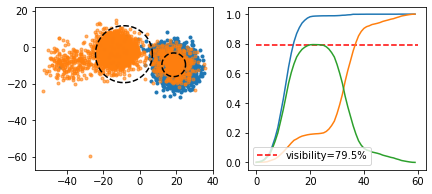

In [394]:
q_target = q10
# await measure.attinst['com8'].set_att(29)
await mrw.jpa_switch(measure,'ON')
job = Job(mrw.threshHold, (measure,[q_target.q_name]), tags=[q_target.q_name], max=3)
st, s_st, s_st_Q = await job.done()
num = measure.n
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(7,3*num))
for i in range(measure.n):
    s_off, s_on, s_on2 = s_st[0,:,i], s_st[1,:,i], s_st[2,:,i]
    data = await mrw.visibility(1,s_off,s_on)
    ax0 = axes[i][0] if num>1 else axes[i]
    ax0.plot(np.real(s_off),np.imag(s_off),'.')
    ax0.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
#     ax0.plot(np.real(s_on2),np.imag(s_on2),'.',alpha=0.6)
    ax0.plot(*(data[0][3]),'k--')
    ax0.plot(*(data[0][4]),'k--')
    ax0.axis('equal')
    ax1 = axes[i][1] if num>1 else axes[i+1]
    for j in data[0][:3]:
        ax1.plot(j)
    maxdata = np.max(data[0][2])
    ax1.hlines(maxdata,0,60,'r','--',label=f'visibility={round(maxdata*100,1)}%')
    ax1.legend(loc='lower left')
#     ax1.vlines([0],10,-100)
#     ax1.hlines([0],-10,100)

plt.show()

In [96]:
q5.DRAGScaling = None

In [308]:
pop = mrw.readPop(measure,s_st[1])
np.array(pop)[0,1] 

1.1330147351652728

In [391]:
np.shape(s_on)

(3008,)

In [98]:
q_target = q5
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
task = await mrw.executeZwave(measure,cww.zWave,dcstate={},output=True,during=0/1e9,shift=0e-9)
task_ex = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[q_target.q_name],output=True)
mrw.concurrence([{**task[0],**task_ex[0]},{**task[1],**task_ex[1]}])
measure.delta,measure.base,measure.readlen = q_target.state[1:]
await cww.RecoverInst(measure,state=q_target.state[0])
measure.qubitToread = [q_target.q_name]
measure.readamp = q_target.readamp
measure.ringup = q_target.ringup
measure.ringupamp = q_target.ringupamp
pulse = await cww.modulation_read(measure,measure.delta,readlen=1200,weight=q_target.weight)

In [99]:
measure.f_lo = f_cavity['q5']+20e6

In [342]:
# pulselist = await cww.funcarg(cww.rabiWave,q9,shift=1000/1e9)
# await cww.writeWave(awg133,name=['ch2','ch6'],pulse=pulselist)
# await cww.couldRun(awg133)
pulse1 = await cww.funcarg(cww.zWave,q3,during=2000/1e9,volt=0.0,shift=5000e-9)
# pulse2 = await cww.funcarg(cww.zWave,q2,pi_len=10000/1e9,volt=0,shift=1500e-9)
# pulse = pulse1 + pulse2
# pulse = np.array(pulse1) + np.array(pulse2)
await cww.writeWave(measure,awg132,['ch5'],pulse1)
await cww.couldRun(measure,awg132)

In [821]:
measure.qubits['q1'].zCali = None

In [395]:
state = await cww.QueryInst(measure)
q10.replace(state=[state,measure.delta,measure.base,measure.readlen])
pd.DataFrame(state)

,q8,q6,q3,q5,q4,q9,q2,q7,jpa,q10,...,psg_lo,psg_ex1,psg_trans,psg_pump,awg131,awg132,awg133,awg134,awgread,awg_trig
ch1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,ON,OFF,OFF
ch3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ON,ON,ON,OFF,ON,ON
ch6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,ON,OFF,OFF
ch7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
ch8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,OFF,ON,OFF,OFF,OFF,OFF
error,+0,+0,+0,+0,+0,+0,+0,+0,+0,+0,...,0,0,0,0,0,0,0,-420,0,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.749100GHz,4.434000GHz,4.999000GHz,13.502000GHz,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
np.shape(s_off)

(3008,)

0.5904255319148937


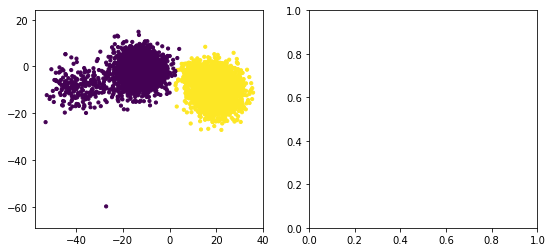

In [396]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(1):
    i = 0
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    S = list(s_off) + list(s_on)
    x,z = np.real(S), np.imag(S)
    d = list(zip(x,z))
    kmeans = KMeans(n_clusters=2,max_iter=100,tol=0.001)
    kmeans.fit(d)
    measure.predict[measure.qubitToread[i]] = kmeans.predict
    y = kmeans.predict(d)
    print(list(y).count(1)/len(y))
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.scatter(x,z,c=y,s=10)
    ax.axis('equal')
plt.show()

In [16]:
np.max(y)

2

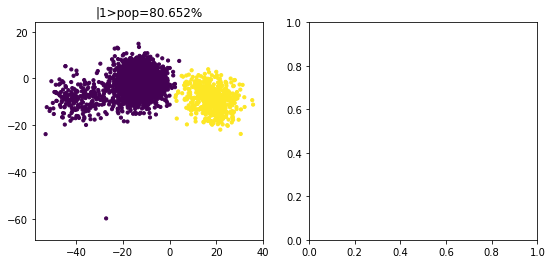

In [397]:
# sns.reset_orig()
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(1):
    i=0
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ss, which = s_on, 0
    d = list(zip(np.real(ss),np.imag(ss)))
    y = measure.predict[measure.qubitToread[i]](d)
    percent1 = list(y).count(which)/len(y)
    measure.onwhich[measure.qubitToread[i]] = (which if percent1 > 0.5 else 1-which)
    measure.offwhich[measure.qubitToread[i]] = (1-which if percent1 > 0.5 else which)
    percent_on = list(y).count(measure.onwhich[measure.qubitToread[i]])/len(y)
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.scatter(np.real(ss),np.imag(ss),c=y,s=10)
    ax.set_title(f'|1>pop={round(percent_on*100,3)}%')
    ax.axis('equal')
plt.show()

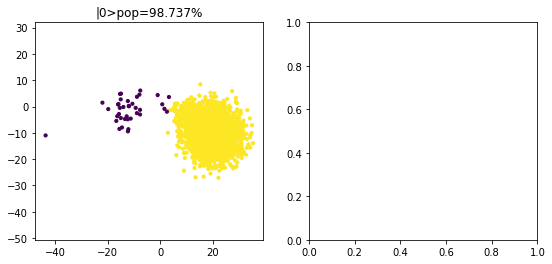

In [398]:
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(1):
    i = 0
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ss, which = s_off, measure.offwhich[measure.qubitToread[i]]
    d = list(zip(np.real(ss),np.imag(ss)))
    y = measure.predict[measure.qubitToread[i]](d)
    percent_off = list(y).count(which)/len(y)
    measure.readmatrix[measure.qubitToread[i]] = np.mat([[percent_off,1-percent_on],[1-percent_off,percent_on]])
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.scatter(np.real(ss),np.imag(ss),c=y,s=10)
    ax.set_title(f'|0>pop={round(percent_off*100,3)}%')
    ax.axis('equal')
plt.show()

In [24]:
measure.readmatrix

{'q2': matrix([[0.98969415, 0.07280585],
         [0.01030585, 0.92719415]]), 'q3': matrix([[0.98005319, 0.10571809],
         [0.01994681, 0.89428191]])}

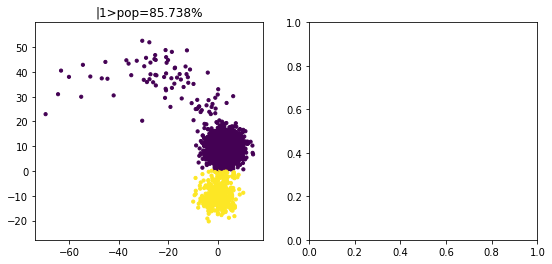

In [451]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(1):
    i = 0
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ss, which = s_on, measure.onwhich[measure.qubitToread[i]] 
    d = list(zip(np.real(ss),np.imag(ss)))
    y = measure.predict[measure.qubitToread[i]](d)
    percent = list(y).count(which)/len(y)
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.scatter(np.real(ss),np.imag(ss),c=y,s=10)
    ax.set_title(f'|1>pop={round(percent*100,3)}%')
    ax.axis('equal')
plt.show()

# JPA饱和功率

In [260]:
async def SaturationPower(readamp):
    n = measure.n
    for k in readamp:
        measure.readamp = [k]
        await cww.modulation_read(measure,measure.delta,readlen=measure.readlen,repeats=500)
        await cww.couldRun(measure.awg['awgread'])
        sm = []
        for j in ['OFF','ON']:
            await psg_pump.setValue('Output',j)
#             x = await psg_pump.getValue('Output')
#             print(x)
#             time.sleep(0.5)
            ch_A, ch_B,I,Q = await ats.getIQ()
            Am, Bm = ch_A.mean(axis=0),ch_B.mean(axis=0)
            s = Am + 1j*Bm
#             print(j,np.abs(s))
            sm.append(s)
        yield [k]*n, sm[1]/sm[0]

Output()

<IPython.core.display.Javascript object>


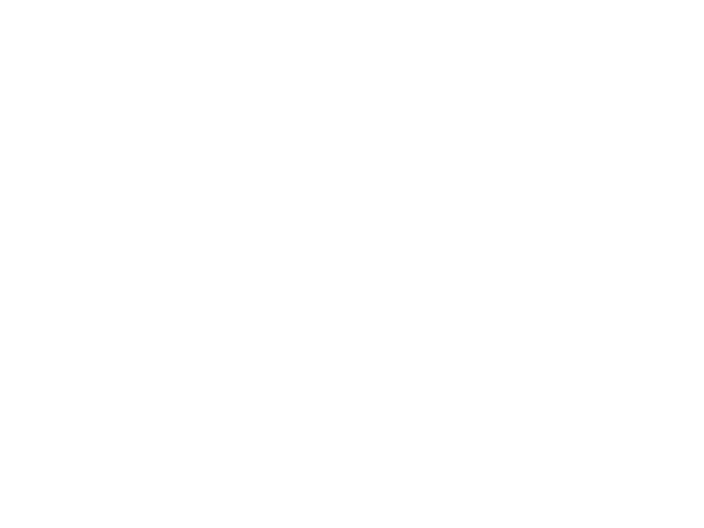

In [262]:
readamp = np.linspace(0.01,0.36,36)
await mrw.jpa_switch(measure,'ON')
await psg_ex1.setValue("Output",'OFF')
job = Job(SaturationPower, (readamp,), tags=['jpa'], max=len(readamp))
a_sp, s_sp = await job.done()
fig = plt.figure(num='jpa')
plt.plot(a_sp,20*np.log10(np.abs(s_sp)),'-o')
# plt.legend(loc=4,labels=['q%d'%(i+1) for i in range(10)])
plt.show()

<IPython.core.display.Javascript object>


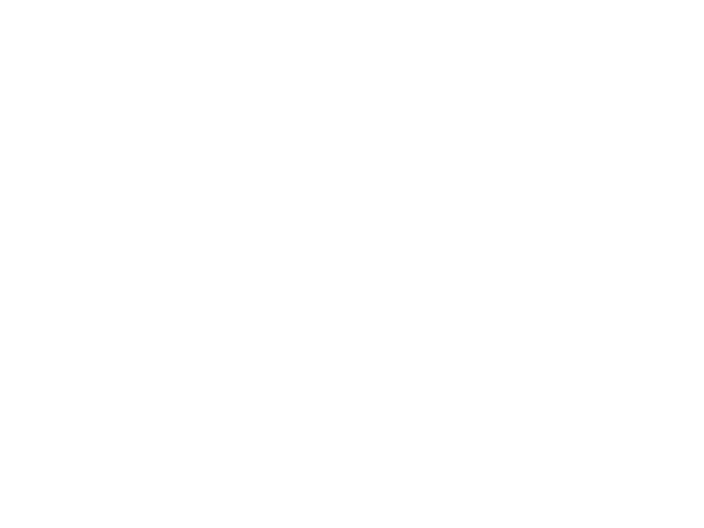

In [152]:
fig = plt.figure(num='jpa')
plt.plot(a_sp,20*np.log10(np.abs(s_sp)),'-.')
# plt.legend(loc=4,labels=['q%d'%(i+1) for i in range(10)])
plt.show()

In [956]:
measure.delta = np.array([30e6,70e6])

# 优化读出功率

In [115]:
fig = plt.figure(num='readamp')

<Figure size 432x288 with 0 Axes>

In [861]:
measure.delta

array([90750000., 50000000.])

In [114]:
q_target, which = q10, measure.onwhich
readamp = np.linspace(-0.5*measure.readamp,0.5*measure.readamp,51) + measure.readamp
# await measure.attinst['com8'].set_att(29)
await mrw.jpa_switch(measure,'ON')
for i in ['OFF','ON']:
    ex_lo_state = i
    await measure.psg[q_target.inst['ex_lo']].setValue('Output',ex_lo_state)
    job = Job(mrw.readpowerOpt, (measure,which,readamp), tags=[q_target.q_name], max=len(readamp))
    v_r, pop_r = await job.done()
    plt.figure(num='readamp')
    plt.plot(v_r,pop_r,'-.',label=ex_lo_state)
    plt.legend(loc='best')
    plt.show()

Output()

Output()

In [64]:
measure.readamp 

0.07500000000000001

In [319]:
readamp

array([0.1125, 0.117 , 0.1215, 0.126 , 0.1305, 0.135 , 0.1395, 0.144 ,
       0.1485, 0.153 , 0.1575, 0.162 , 0.1665, 0.171 , 0.1755, 0.18  ,
       0.1845, 0.189 , 0.1935, 0.198 , 0.2025, 0.207 , 0.2115, 0.216 ,
       0.2205, 0.225 , 0.2295, 0.234 , 0.2385, 0.243 , 0.2475, 0.252 ,
       0.2565, 0.261 , 0.2655, 0.27  , 0.2745, 0.279 , 0.2835, 0.288 ,
       0.2925, 0.297 , 0.3015, 0.306 , 0.3105, 0.315 , 0.3195, 0.324 ,
       0.3285, 0.333 , 0.3375])

# Crosstalk矫正

In [19]:
q2.state[1:]

[array([2.3465e+08, 2.1680e+08, 1.9200e+08, 1.7200e+08, 1.4930e+08,
        1.3745e+08, 1.3120e+08, 9.0750e+07, 7.0150e+07, 5.0000e+07]),
 array([-2.02791966+1.98358918j,  0.94964959+0.4076137j ,
         0.45040781-0.96442989j,  0.57294871+1.08435417j,
        -0.65608159+0.8892474j ,  1.49922606+0.18699409j,
         0.27348558-0.38805388j,  0.08288527+1.49532472j,
        -1.98253305+0.78429459j, -0.84952816-2.57848346j]),
 1500]

In [16]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]

v_rabi = np.linspace(-0.02,0.02,101)
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.1]
for v, k in enumerate(bits[7:],start=7):
    count = 0
    q_target = k
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
    measure.delta = measure.delta[v:(v+1)]
    #measure.readamp = 0.3
    await cww.modulation_read(measure,measure.delta,measure.readlen)
    await awg133.run()
    f_list = await ats.getValue('f_list')
#     await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
    for i,j in enumerate(bits):
        comwave = True if count == 0 else False
        q_bias = j
        if q_bias == q_target:
            continue
        else:
            tag = q_target.q_name + '_' + q_bias.q_name
            print(tag,f_list)
            job = Job(mrw.crosstalkSpec, (measure,v_rabi,[q_bias.q_name],[q_target.q_name],comwave), tags=[tag], max=11)
            v_ex, v_bias, s_sc = await job.done()
            await measure.awg[q_bias.inst['z_awg']].update_waveform(np.zeros((250000,)),f"ch{q_bias.inst['z_ch'][0]}")
            count += 1
    await cww.InitInst(measure,psgdc=True,awgch=True)
    await measure.awg[q_target.inst['z_awg']].update_waveform(np.zeros((250000,)),f"ch{q_target.inst['z_ch'][0]}")                                                                

q8_q1 [90900000.]


Output()

q8_q2 [90900000.]


Output()

q8_q3 [90900000.]


Output()

q8_q4 [90900000.]


Output()

q8_q5 [90900000.]


Output()

q8_q6 [90900000.]


Output()

q8_q7 [90900000.]


Output()

q8_q9 [90900000.]


Output()

q8_q10 [90900000.]


Output()

q9_q1 [70300000.]


Output()

q9_q2 [70300000.]


Output()

q9_q3 [70300000.]


Output()

q9_q4 [70300000.]


Output()

q9_q5 [70300000.]


Output()

q9_q6 [70300000.]


Output()

q9_q7 [70300000.]


Output()

q9_q8 [70300000.]


Output()

q9_q10 [70300000.]


Output()

q10_q1 [50000000.]


Output()

q10_q2 [50000000.]


Output()

q10_q3 [50000000.]


Output()

q10_q4 [50000000.]


Output()

q10_q5 [50000000.]


Output()

q10_q6 [50000000.]


Output()

q10_q7 [50000000.]


Output()

q10_q8 [50000000.]


Output()

q10_q9 [50000000.]


Output()

In [16]:
measure.n = 1

# 真空拉比

In [21]:
q1.replace(envelopename=['hanning',1],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=300e6,pi_len=30e-9,\
         seqtype='PDD',detune=3e6,DRAGScaling=None)
q2.replace(envelopename=['hanning',1],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=110e6,pi_len=40e-9,\
         seqtype='PDD',detune=3e6,DRAGScaling=None)

In [476]:
q1.timing['read>xy'] = 500e-9
# q2.timing['z>xy'] = 300e-9

In [455]:
dt.biasshift(q1.specfuncz,q1.f_ex/1e9,(q2.f_ex-q1.f_ex)/1e9) 

-0.3361312623754148

In [700]:
q3.inst

{'z_awg': 'awg132',
 'z_ch': [5],
 'ex_awg': 'awg134',
 'ex_ch': [3, 7],
 'ex_lo': 'psg_ex1',
 'com': 'com3'}

In [631]:
t_rabi, v_rabi = np.linspace(0,200,201), np.linspace(-0.03,0.03,61) + (0.205)
# t_rabi = np.array([20])
# v_rabi = np.linspace(0.03,0.06,16)
mode = 'vbroadcast'
for i in [0]:
    imAmp = i
    # await psg[measure.qubits[q_target].inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))
    job = Job(mrw.vRabi, (measure,t_rabi,v_rabi,mode,['q6'],['q6'],imAmp), tags=[f'modulation={imAmp}','dc-q6','ex-q6'], max=len(v_rabi))
    vv, tv, sv = await job.done()
    clear_output()

In [455]:
q2.timing = {'z>xy': -2e-09, 'read>xy': 0e-9}

In [60]:
measure.qubits['q10'].asdict()

{'q_name': 'q10',
 'inst': {'z_awg': 'awg131',
  'z_ch': [5],
  'ex_awg': 'awg134',
  'ex_ch': [2, 6],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.966, 0.068],
 'T_z': [1.743, 0.24],
 'specfunc': 1.100570041495*(0.799797230220902*tan(1.05818052116834*x - 0.0719562754394469)**2 + 1)**(1/4)*sqrt(Abs(cos(1.05818052116834*x - 0.0719562754394469))) - 0.281007883786446,
 'specfunc_cavity': sqrt((1.100570041495*(0.799797230220902*tan(1.05818052116834*x - 0.0719562754394469)**2 + 1)**(1/4)*sqrt(Abs(cos(1.05818052116834*x - 0.0719562754394469))) - 6.89483714603135)**2 + 2.74286987210981)/2 + 0.5502850207475*(0.799797230220902*tan(1.05818052116834*x - 0.0719562754394469)**2 + 1)**(1/4)*sqrt(Abs(cos(1.05818052116834*x - 0.0719562754394469))) + 3.16641068922923,
 'photonnum_func': None,
 'bias': 0.15,
 'zpulse': None,
 'f_lo': array([6.576e+09]),
 'delta': array([50000000.]),
 'f_ex': 5390000000.0,
 'delta_ex': 300000000.0,
 'alpha': 266000000.0,
 'power_ex': 60,
 'power_rabi': 30,
 'pi_

In [255]:
# zCali = measure.qubits['q2'].zCali
zCali

{'1st': {'pexp': array([ 6.29314047e-04,  2.32565457e-01,  2.64029906e-01, -4.14479389e-03,
          5.55472525e-04, -1.23407503e+00,  9.30718056e-03,  2.61476877e+00,
          8.75207640e-03, -1.39702942e+00,  8.29201701e-03]),
  'ppoly': array([-1.17449357e-27,  5.37716985e-01,  6.70675683e-01, -1.24462921e+02,
          9.09558140e+03, -3.28158675e+05,  5.85562704e+06, -4.11558808e+07,
          1.00000000e-10,  1.00000000e-10,  1.00000000e-10,  1.00000000e-10,
          1.00000000e-10,  1.00000000e-10,  1.00000000e-10,  1.00000000e-10,
          1.00000000e-10,  1.00000000e-10,  1.00000000e-10,  1.00000000e-10,
          1.00000000e-10,  1.00000000e-10,  1.00000000e-10,  1.00000000e-10,
          1.00000000e-10,  1.00000000e+00]),
  'time': [90, 0, 15, 0.4]},
 '2nd': {'pexp': array([-0.00044072]),
  'ppoly': array([-2.08329771e-26,  6.97004862e-01, -9.17710290e+00,  1.38847442e+03,
         -8.35667040e+04,  2.50944734e+06, -3.76334220e+07,  2.25512485e+08,
          1.00000000e-

## 单条扫电压

In [134]:
t_rabi, v_rabi = 20e-9, np.linspace(-0.02,0.02,101) + (-0.061)

# v_rabi = np.linspace(0.03,0.06,16)
mode = 'vbroadcast'
imAmp = 0

qubit_ex = measure.qubits['q9']
namelist = [f'ch{i}' for i in qubit_ex.inst['ex_ch']]
chlist = qubit_ex.inst['ex_ch']
awg_ex = measure.awg[qubit_ex.inst['ex_awg']]
pulselist = await cww.funcarg(cww.rabiWave,qubit_ex,shift=t_rabi)
await cww.writeWave(measure,awg_ex,name=namelist,pulse=pulselist)
await cww.couldRun(measure,awg_ex,chlist,namelist)

job = Job(mrw.singleVrabi, (measure,v_rabi,t_rabi,mode,['q10'],['q9'],imAmp), tags=['dc-q10','ex-q9'],avg=True, max=300)
vv, sv = await job.done()

Output()

In [ ]:
await psg_ex1.setValue('Frequency',(q9.f_ex+q9.delta_ex))

In [135]:
vv[:,1][np.argmax(np.abs(sv[:,1]))]

-0.06540000000000007

## 单条扫时间

In [ ]:
t_rabi, v_rabi = np.linspace(0,100,101), -0.061

mode = 'vbroadcast'
imAmp = 0
dcstate, exstate = ['q10'], ['q9']

task_z = await executeZseq(measure,cww.Z_sequence,len_data,True,mode=mode,dcstate=dcstate,\
    v_or_t=t_rabi/1e9,arg='during',volt=j,delta_im=0e6,imAmp=imAmp)
concurrence(task_z)
job = Job(rabi_seq, (measure,t_rabi,'shift',exstate,True,True,mode), tags=exstate, max=300,avg=True)
t_t, s_t = await job.done()

# 纵场调制

In [18]:
# q10.volt = -0.0654
# q9.volt = 0
data = np.load(r'D:/QuLabData/2020/1008/crosstalk_cali/zheng_crosstalk_q1-10_20201008222347.npz')
data_new = np.load(r'D:/QuLabData/2020/1114/crosstalk_cali/zheng2_crosstalk_q1-10_20201114104601.npz')
calimatrix = np.mat(data['mat'])
# fc,vtarget = dt.specshift(q10.specfuncz,q10.f_ex/1e9,q10.volt)
# fc1,vtarget = dt.specshift(q9.specfuncz,q9.f_ex/1e9,q9.volt)
# fc,fc1

In [191]:
q9.phaseim = 2.5
q10.phaseim = 0
q10.f_ex = q10.f_ex - 158.75e6

5390200000.0

In [66]:
measure.qubits['q9'].asdict()

{'q_name': 'q9',
 'inst': {'z_awg': 'awg131',
  'z_ch': [1],
  'ex_awg': 'awg133',
  'ex_ch': [2, 6],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.631, -0.184],
 'T_z': [1.629, -0.128],
 'specinterp': [array([4.16503571, 4.16504576, 4.1650558 , ..., 5.3881712 , 5.38817139,
         5.38817159]),
  array([-0.5       , -0.49999808, -0.49999616, ..., -0.02000384,
         -0.02000192, -0.02      ])],
 'specfunc': 1.5973401693829*(0.91580251930948*tan(1.19363906036943*x + 0.171884024693199)**2 + 1)**(1/4)*sqrt(Abs(cos(1.19363906036943*x + 0.171884024693199))) - 0.682533400674553,
 'specfuncz': [5.77489162283576*(0.0126845778676501*tan(1.85339027027126*x + 0.017939641923017)**2 + 1)**(1/4)*sqrt(Abs(cos(1.85339027027126*x + 0.017939641923017))) - 0.386198491277849,
  -0.009679365544738376,
  1.6950518754638708,
  10.794116888297738,
  0.3861984912778487,
  0.1126258312628597],
 'specfunc_cavity': sqrt((1.5973401693829*(0.91580251930948*tan(1.19363906036943*x + 0.171884024693199)**2 

In [15]:
t_rabi, v_rabi = np.linspace(0,250,251), np.linspace(0,0.4,41)
mode = 'vbroadcast'
job = Job(mrw.vModulation, (measure,t_rabi,v_rabi,mode,['q10'],['q9'],calimatrix), tags=['dc-q10','ex-q9'], max=len(v_rabi))
vv, tv, sv = await job.done()
clear_output()

## population

In [197]:
t_rabi, v_rabi = np.linspace(3,203,201), np.linspace(0,0.45,26)
which = measure.onwhich
caliM = calimatrix[8:10,8:10]
delta_im = 120e6
await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=None)
job = Job(mrw.vModulation_pop, (measure,t_rabi,v_rabi,['q10'],['q9'],caliM,which), tags=[f'{delta_im/1e6}MHz','dc-q10','ex-q9'], max=len(t_rabi))
vv, tv, sv = await job.done()
# clear_output()

Output()

In [191]:
during, imAmp = 0, 0
pulse_im = (wn.square(during,0e-9) << (during/2 ))
if 1 != 0:
    wav_I, wav_Q = wn.mixing(imAmp*pulse_im,phase=0.0,freq=120e6,ratioIQ=-1.0)
fc,vtarget = dt.specshift(q10.specfuncz,q10.f_ex/1e9,q10.volt)
    
fshift, = cww.pulseTowave((wav_I,))
vwindow, = cww.pulseTowave((pulse_im,))
bias = dt.biasshift(q10.specfuncz,fc,fshift) - vtarget*vwindow*imAmp

# 矫正相位

In [74]:
phase = np.linspace(0,2*np.pi,101)
caliM = calimatrix[8:10,8:10]
delta_im = 120e6
job = Job(mrw.phaseCali,(measure,phase,'vbroadcast',['q10'],['q9'],caliM),tags=[f'{delta_im/1e6}MHz','dc-q10','ex-q9'],max=300,avg=True)
pv, sv = await job.done()

Output()

# 矫正频率

In [161]:
q10.replace(nwave=0,seqtype='PDD',detune=0e6)

In [147]:
# -0.0654
volt = np.linspace(3,53,101) 
job = Job(mrw.freqCali,(measure,volt,'vbroadcast',['q10'],['q10']),tags=['dc-q10','ex-q10'],max=300,avg=True)
pv, sv = await job.done()

Output()

In [192]:
fc,vtarget

(5.219996629441422, -0.27751931870315905)

In [195]:
bias

array([1.32968163e-06, 1.32968163e-06, 1.32968163e-06, ...,
       1.32968163e-06, 1.32968163e-06, 1.32968163e-06])

In [201]:
dt.biasshift(q10.specfuncz,fc,0)

1.3296816263608235e-06

In [203]:
1/2**15

3.0517578125e-05

# Zpulse_XY

Output()

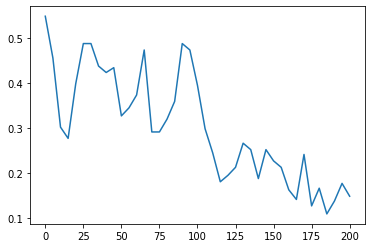

In [46]:
q_target = 'q3'
which, tshift, t_int = measure.offwhich, 3000, 0
tdelay = np.linspace(0,200,41)
# await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
job = Job(mrw.zPulse_XY, (measure,tdelay,t_int,tshift,which,[q_target]), tags=[q_target], max=len(tdelay))
t_xy, pop_xy = await job.done()
plt.figure()
plt.plot(t_xy,pop_xy)
plt.show()

In [292]:
async def optZpulse(t1,t2,t3,t4,t5,t6,t7,t8,t9,t10):
    caliparas = (t1,t2,t3,t4,t5,t6,t7,t8,t9,t10)
    job = Job(mrw.zPulse_XY, (measure,tdelay,t_int,tshift,which,caliparas,['q2']), tags=['q2'], max=len(tdelay))
    t_xy, pop_xy = await job.done()
    s = pop_xy[:,0]
    l = int(len(s)/3)
    return np.sum((s[:2*l]-np.mean(s[2*l:]))**2)

    
which, tshift, t_int = measure.offwhich, 5000, 20
tdelay = np.append(np.linspace(10,200,20),np.linspace(3000,4000,10))
    
start = [1.84e-9,0.0272,1.406e-8,-0.1765,2.183e-9,0,5.489e-7,-0.0172,8.57e-8,-0.0107]
senstive = np.abs(start)/2
args = measure,tdelay,t_int,tshift,which,['q10']
ret = opt.optimize(optZpulse,start,senstive,[3]*10,print_info=True,algorithm='minimize')

Output()

.o
[ 0.     0.027  0.    -0.176  0.     0.     0.    -0.017  0.    -0.011] 0.4055818557739258   .

Output()

.o
[ 0.     0.041  0.    -0.176  0.     0.     0.    -0.017  0.    -0.011] 0.008951187133789062   .

Output()

.o
[ 0.     0.027  0.    -0.088  0.     0.     0.    -0.017  0.    -0.011] 0.00548076629638672   ...

Output()

..

Output()

In [367]:
measure.onwhich

[0]

# pi脉冲振幅

In [1147]:
q_target = q10
t_rabi = np.linspace(1,501,201)
att_single = 35

com9 open...
last ATT 35.0
now ATT 35.0


Output()

<IPython.core.display.Javascript object>


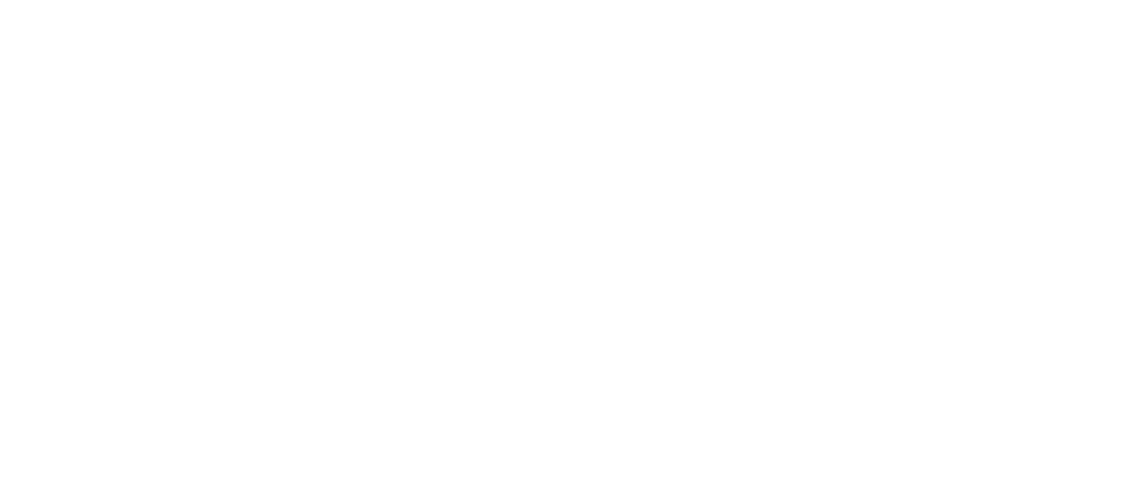

In [1149]:
tag = q_target.q_name
mr.Att_Setup(measure,q_target.inst['com']).Att(att_single)
await psg[q_target.inst['ex_lo']].setValue('Output','ON')
await psg['psg_lo'].setValue('Output','ON')
await mr.jpa_switch(measure,'ON')
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.pipulseAmp, (q_target,measure,t_rabi), tags=[tag], max=9)
amp_pi, t_amp, s_amp = await job.done()
state = await mr.QueryInst(measure)
x, y , s = amp_pi[:,0], t_amp[0][:,0], s_amp[:,:,0]
wlist = [((op.RowToRipe().fourier(y,np.abs(i)))[0]) for i in s]
t_op = op.RowToRipe().firstMax(y,np.abs(s[-1]),num=0,peakpercent=0.7)
a = np.polyfit(x,wlist,1)
z = np.poly1d(a)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
axes[0].set_title('$pi/2=%.1f$'%t_op)
axes[1].set_yticks(x)
axes[1].plot(x,wlist,'.')
axes[1].plot(x,z(x))
axes[1].set_title(f'$grad={a[0]}$')
plt.show()

<IPython.core.display.Javascript object>


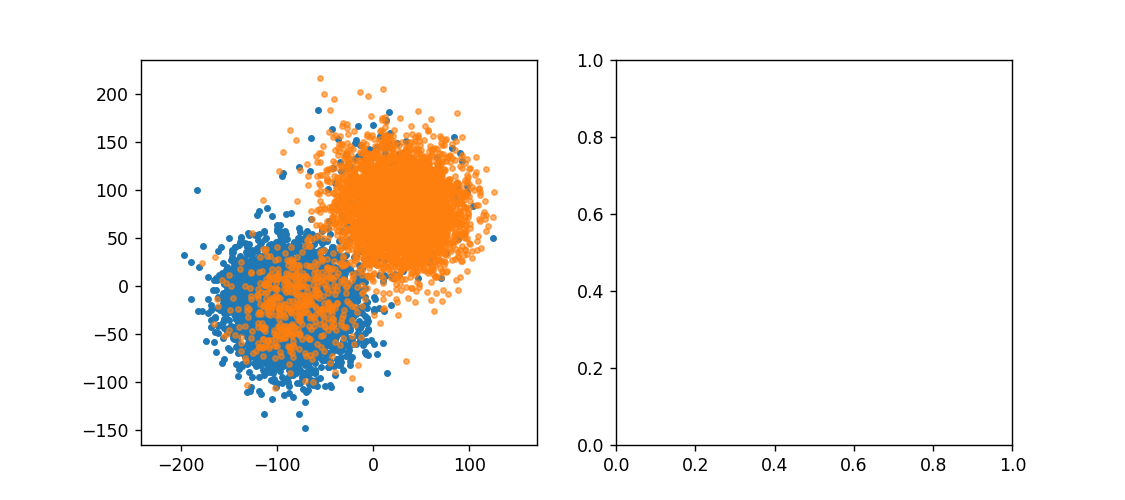

In [561]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st_Q[0,:,i], s_st_Q[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
#     ax.vlines([0],10,-100)
#     ax.hlines([0],-10,100)
    ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


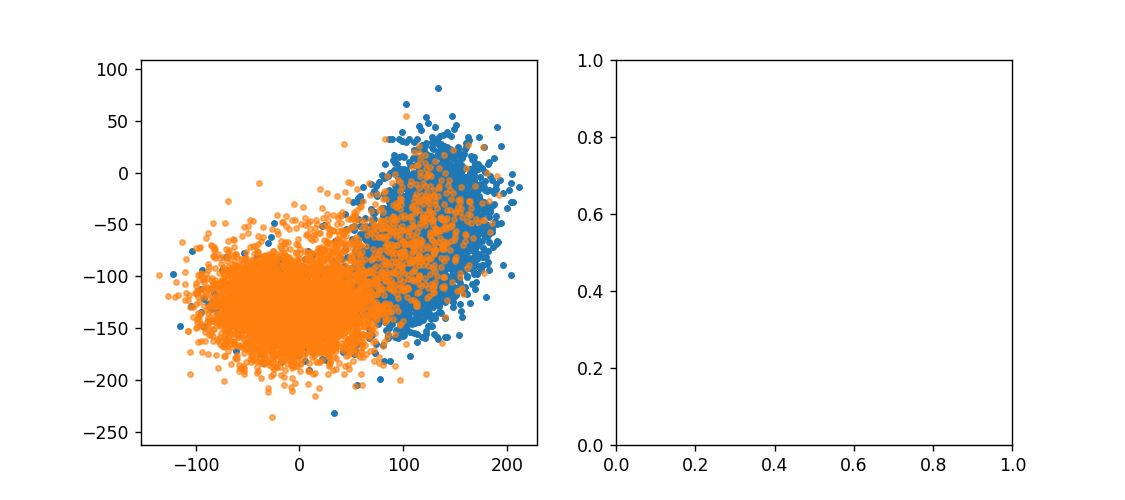

In [227]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
#     ax.vlines([0],10,-100)
#     ax.hlines([0],-10,100)
    ax.axis('equal')
plt.show()

## 测试

com7 open...
last ATT 13.5
now ATT 11.0


Output()

<IPython.core.display.Javascript object>


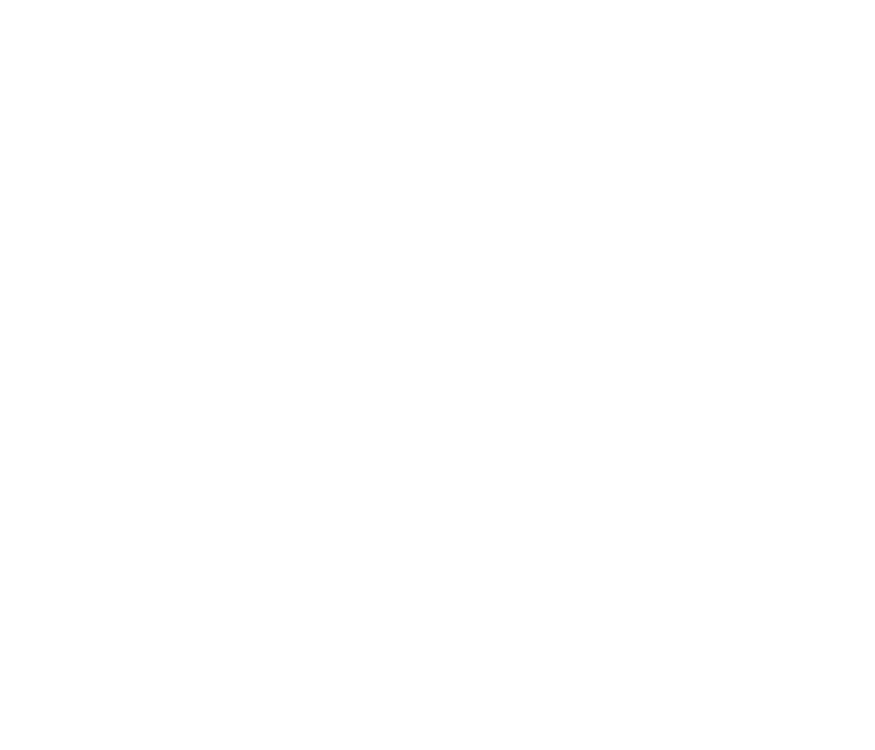

In [1134]:
exstate = {'q1':35,'q10':35}
# await measure.psg['psg_lo'].setValue('Power',13)
mr.Att_Setup(measure,'com7').Att(11)
job = Job(mr.threshHoldtest, (measure,True,exstate), tags=exstate.keys(), max=2)
st, s_st = await job.done()
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(7,3*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
    ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


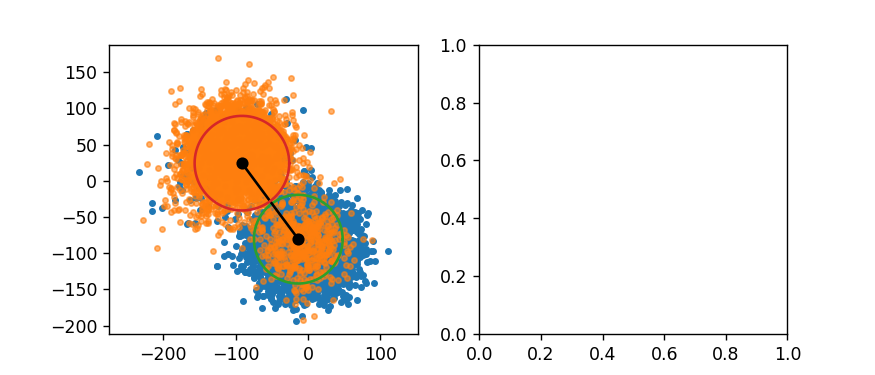

In [565]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(7,3*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    x, y = s_off, s_on
    offmean, onmean = np.mean(x), np.mean(y)
    offstd, onstd = np.std(x), np.std(y)
    theta = np.arange(0, 2*np.pi, 0.01)
    roff = np.real(offmean) + offstd * np.cos(theta)
    ioff = np.imag(offmean) + offstd * np.sin(theta)
    ron = np.real(onmean) + onstd * np.cos(theta)
    ion = np.imag(onmean) + onstd * np.sin(theta)
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
    ax.axis('equal')
    ax.plot(roff,ioff)
    ax.plot([np.real(offmean),np.real(onmean)],[np.imag(offmean),np.imag(onmean)],'k-o')
    ax.plot(ron,ion)
plt.show()

<IPython.core.display.Javascript object>


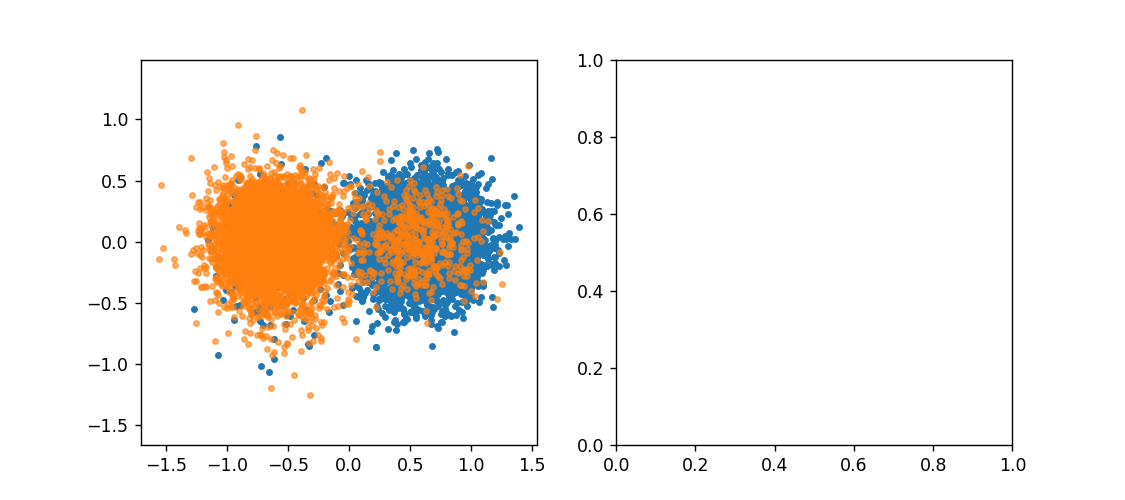

In [566]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    x, y = s_off, s_on
    add, diff = (np.mean(x)+np.mean(y))/2, np.mean(x)-np.mean(y)
    s_off, s_on = (x-add)/diff, (y-add)/diff
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
    ax.axis('equal')
plt.show()

In [252]:
measure.readlen

1200

In [1606]:
measure.qubitToread 

['q1']

0.4888251582278481


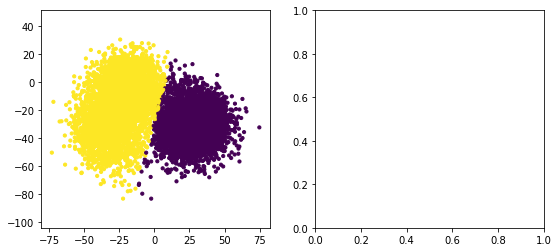

In [85]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
predict = {}
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    S = list(s_off) + list(s_on)
    x,z = np.real(S), np.imag(S)
    d = list(zip(x,z))
    kmeans = KMeans(n_clusters=2,max_iter=100,tol=0.001)
    kmeans.fit(d)
    predict[measure.qubitToread[i]] = kmeans.predict
    y = kmeans.predict(d)
    print(list(y).count(1)/len(y))
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.scatter(x,z,c=y,s=10)
    ax.axis('equal')
plt.show()
measure.predict = predict

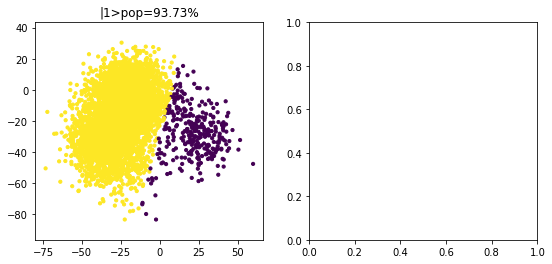

In [86]:
# sns.reset_orig()
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
onwhich, offwhich = [], []
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ss, which = s_on, 0
    d = list(zip(np.real(ss),np.imag(ss)))
    y = measure.predict[measure.qubitToread[i]](d)
    percent1 = list(y).count(which)/len(y)
    onwhich.append(which if percent1 > 0.5 else 1-which)
    offwhich.append(1-which if percent1 > 0.5 else which)
    percent = list(y).count(onwhich[i])/len(y)
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.scatter(np.real(ss),np.imag(ss),c=y,s=10)
    ax.set_title(f'|1>pop={round(percent*100,3)}%')
    ax.axis('equal')
plt.show()
measure.onwhich = onwhich
measure.offwhich = offwhich

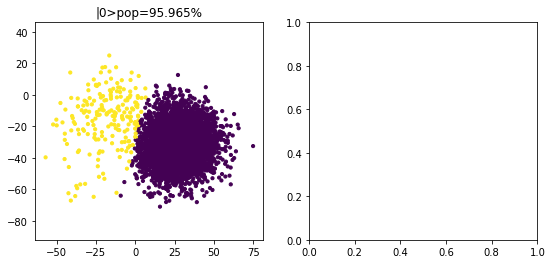

In [87]:
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ss, which = s_off, measure.offwhich[i]
    d = list(zip(np.real(ss),np.imag(ss)))
    y = measure.predict[measure.qubitToread[i]](d)
    percent = list(y).count(which)/len(y)
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.scatter(np.real(ss),np.imag(ss),c=y,s=10)
    ax.set_title(f'|0>pop={round(percent*100,3)}%')
    ax.axis('equal')
plt.show()

# rabiPopulation

com13 open...
last ATT 20.0
now ATT 20.0


Output()

<IPython.core.display.Javascript object>


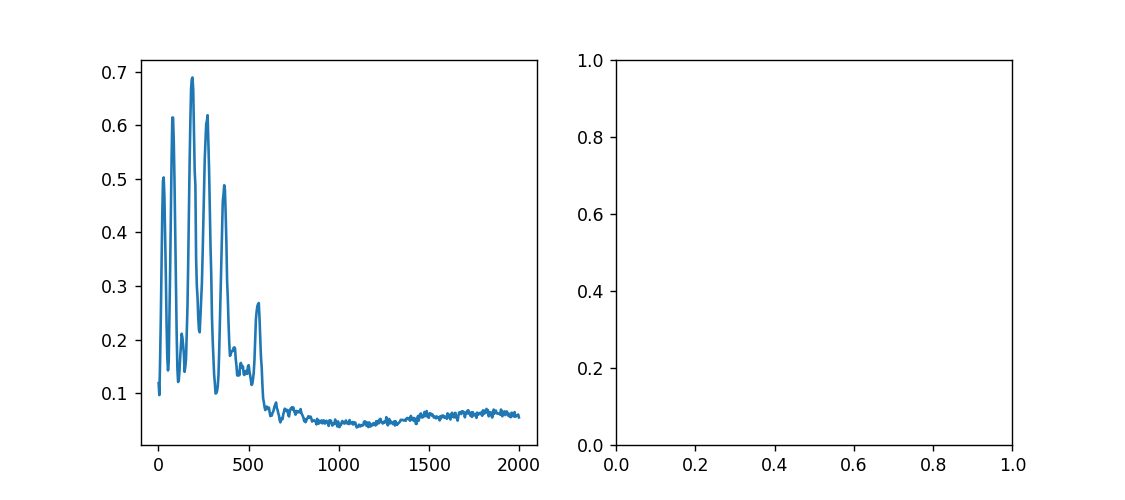

In [98]:
t_rabi, q_target, which = np.linspace(1,2001,501), q3, 1
att_single = 20
# measure.delta,measure.base,measure.readlen = q_target.state[1:]
# await mr.RecoverInst(measure,state=q_target.state[0])
mr.Att_Setup(measure,q_target.inst['com']).Att(att_single)
await psg_ex2.setValue('Output','OFF')
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.rabiPop, (q_target,measure,t_rabi,which), tags=[tag], max=len(t_rabi))
t_rp, pop = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_rp[:,0],np.abs(pop[:,0]))
plt.show()

0.10700158227848101


<IPython.core.display.Javascript object>


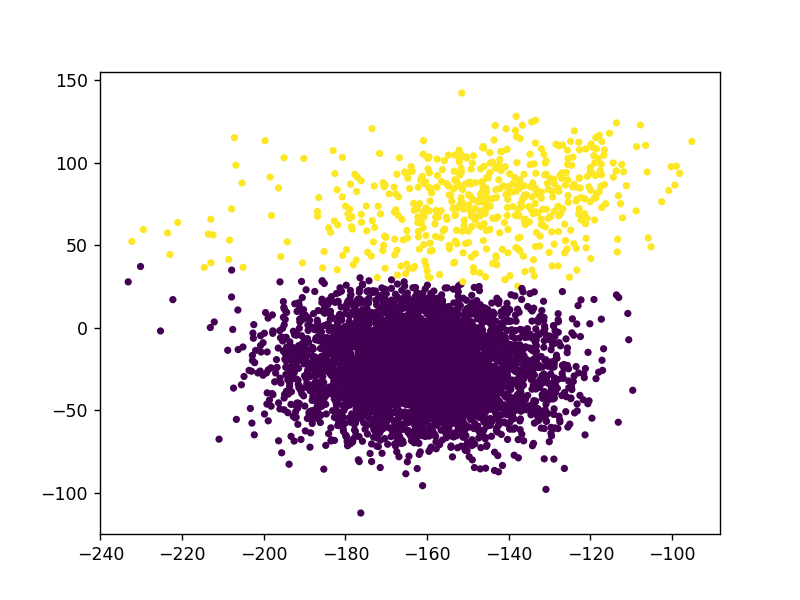

In [148]:
ss, which = pop[4,:,0], 1
d = list(zip(np.real(ss),np.imag(ss)))
y = measure.predict(d)
print(list(y).count(which)/len(y))
plt.figure()
plt.scatter(np.real(ss),np.imag(ss),c=y,s=10)
plt.show()

# 优化读出功率

Output()

<IPython.core.display.Javascript object>


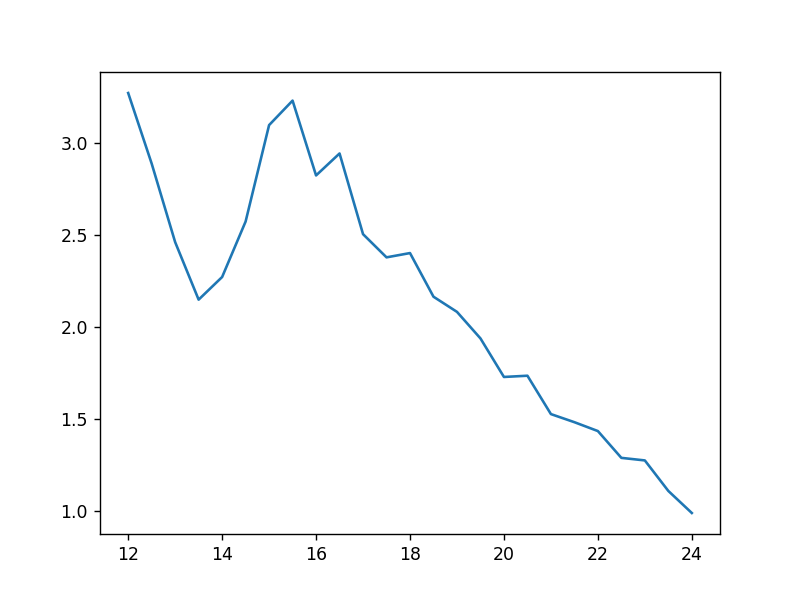

In [77]:
com, att = 'com7', np.linspace(12,24,25)
job = Job(mr.readpowerOpt, (q_target,measure,com,att), tags=[tag], max=len(att))
# attopt, popoff, popon = await job.done()
# plt.figure()
# plt.plot(attopt,popoff)
# plt.plot(attopt,popon)
# plt.show()
attopt, snr = await job.done()
plt.figure()
plt.plot(attopt,snr)
plt.show()

# pi脉冲优化

## sequance

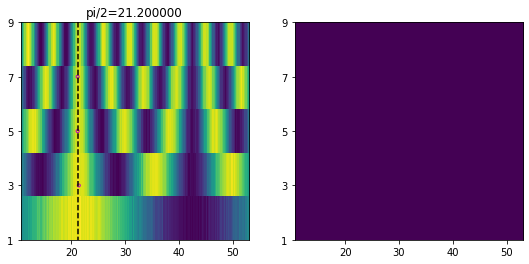

In [81]:
q_target, nwave, wavlen = q6, 5, len(t_rabi)
tag = q_target.q_name
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.pipulseOpt, (q_target,measure,nwave,wavlen), tags=[tag], max=nwave)
n_pi, t_pi, s_pi = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
x, y, s = n_pi[:,0],t_pi[0][:,0], np.abs(s_pi[:,:,0])
index = y[np.argmax(np.abs(s),axis=1)[0]]
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].set_yticks(x)
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
yop = np.array([op.RowToRipe().firstMax(y,z,num=22,peakpercent=0.9,insitu=True) for z in s])
axes[0].scatter(yop[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
axes[0].vlines(np.mean(yop),np.max(x),np.min(x),'k','--')
axes[0].set_title('pi/2=%f'%np.mean(yop))
axes[1].set_yticks(x)
axes[1].imshow(np.angle(s),extent=extent,origin='lower',aspect='auto')
plt.show()

In [82]:
q6 = q6._replace(pi_len=21.2,power_rabi=att_single,state=[state,measure.delta,measure.base,measure.readlen])

## waveform

Output()

<IPython.core.display.Javascript object>


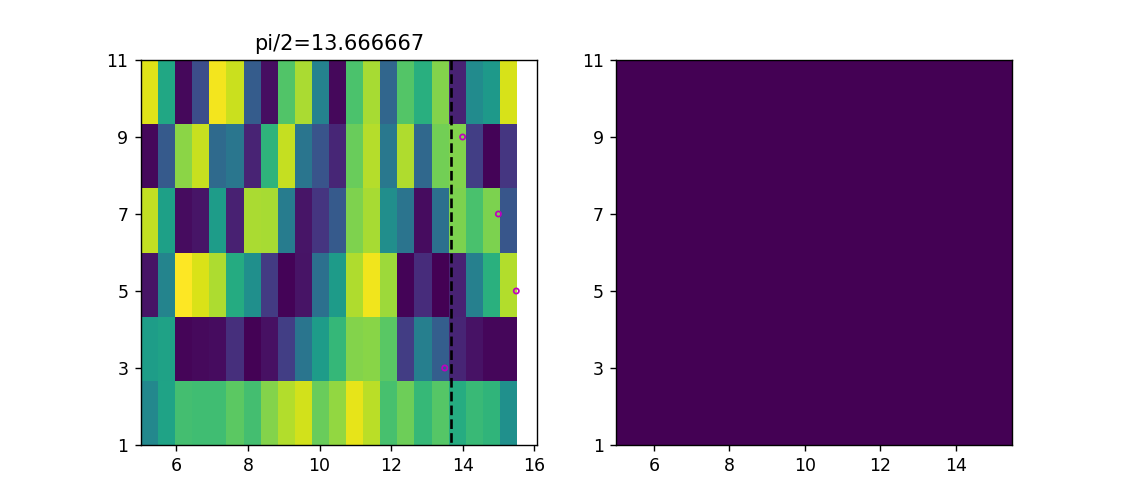

In [100]:
q_target, nwave, wavlen = q3, 6, len(t_rabi)
tag = q_target.q_name
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.pipulseOpt_waveform, (q_target,measure,nwave), tags=[tag], max=nwave)
n_pi, t_pi, s_pi = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
x, y, s = n_pi[:,0],t_pi[0][:,0], np.abs(s_pi[:,:,0])
index = y[np.argmax(np.abs(s),axis=1)[0]]
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].set_yticks(x)
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
yop = np.array([op.RowToRipe().firstMax(y,z,num=16,peakpercent=0.9,insitu=True) for z in s])
axes[0].scatter(yop[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
axes[0].vlines(np.mean(yop),np.max(x),np.min(x),'k','--')
axes[0].set_title('pi/2=%f'%np.mean(yop))
axes[1].set_yticks(x)
axes[1].imshow(np.angle(s),extent=extent,origin='lower',aspect='auto')
plt.show()

# DragcoefHD

Output()

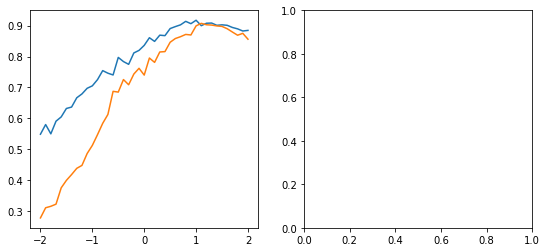

In [89]:
q_target, which, axis = q6, measure.onwhich[0], [['Xnhalf','Xhalf'],['Ynhalf','Yhalf']]
alpha = q_target.alpha * (2*np.pi)
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.dragcoefHD, (q_target,measure,which,alpha,axis,3), tags=[q_target.q_name], max=82)
f_op, s_op = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
l = np.shape(f_op)[0]//2
f1, f2, s1, s2 = f_op[:l,0], f_op[l:,0], np.abs(s_op[:l,0]), np.abs(s_op[l:,0])
axes[0].plot(f1,np.abs(s1))
axes[0].plot(f2,np.abs(s2))
plt.show()

# IQ-Mixer优化相位

Output()

<IPython.core.display.Javascript object>


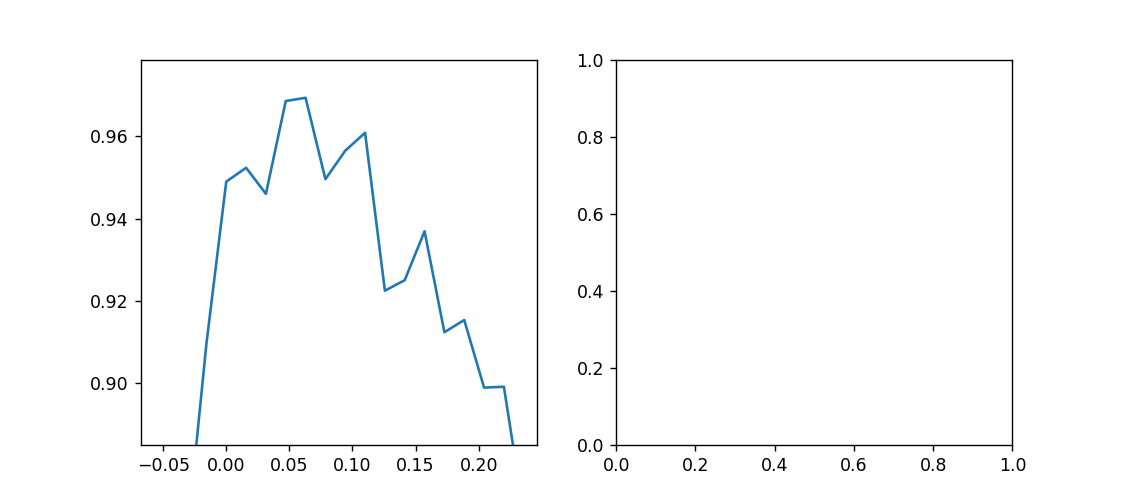

In [106]:
q_target, which = q6, measure.offwhich[0]
alpha = q_target.alpha
job = Job(mr.IQphaseOpt, (q_target,measure,which,5,alpha), tags=[q_target.q_name], max=201)
phase_op, pop = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(phase_op[:,0],np.abs(pop[:,0]))
plt.show()

In [84]:
await psg_ex1.setValue('Frequency',4.0576e9)

In [1232]:
qubit = q5
name, awg_target = [qubit.q_name+'_I', qubit.q_name+'_Q'], measure.awg[qubit.inst['ex_awg']]
await cw.genwaveform(measure,awg_target,name,qubit.inst['ex_ch'])
await cw.modulation_read(measure,measure.delta,tdelay=measure.readlen)
await measure.psg[qubit.inst['ex_lo']].setValue('Frequency',(qubit.f_ex)[0])
await measure.psg['psg_lo'].setValue('Output','ON')
ch1, ch2 = qubit.inst['ex_ch']
    
async def awgoffset(offset1,offset2):
    await awg_target.stop()
    await awg_target.setValue('Offset',offset1,ch=ch1)
    await awg_target.setValue('Offset',offset2,ch=ch2)
    await cw.couldRun(awg_target)
    await measure.psg[qubit.inst['ex_lo']].setValue('Output','ON')
    ch_A, ch_B = await measure.ats.getIQ()
    Am, Bm = ch_A.mean(axis=0),ch_B.mean(axis=0)
    theta0 = np.angle(Am) - np.angle(Bm)
    Bm *= np.exp(1j*theta0)
    s = Am + Bm
    await measure.psg[qubit.inst['ex_lo']].setValue('Output','OFF')
    return np.abs(s - measure.base)

In [1233]:
# await cw.ats_setup(ats18,np.array([50e6]),l=1500,repeats=500)
opt.optimize(awgoffset,[-0.1,-0.5],[0.01,0.01],[3,3],high=[2,2],low=[-2,-2],print_info=True,algorithm='basinhopping')

.o
[-0.1 -0.5] [73.37549395]   .o
[-0.105 -0.5  ] [68.13018893]   ......................o
[-0.105 -0.501] [67.74947406]   .........................................................................o
[ 0.329 -0.831] [67.32442623]   ......................................................................................................................................................................................................................................................................................................o
[-0.115 -1.392] [66.53918799]   ...........................................................................................................................................................................................................................................................................................................................................................................................................................................................

                        fun: 53.40129378817715
 lowest_optimization_result:  final_simplex: (array([[-1.32537874, -0.79252065],
       [-1.32535275, -0.79256951],
       [-1.32529417, -0.79259195]]), array([53.40129379, 53.40129379, 53.40129379]))
           fun: 53.40129378817715
       message: 'Optimization terminated successfully.'
          nfev: 50
           nit: 19
        status: 0
       success: True
             x: array([-1.32537874, -0.79252065])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1518
                        nit: 30
                          x: array([-1.325, -0.793])

# ramseyZpulse

Output()

<IPython.core.display.Javascript object>


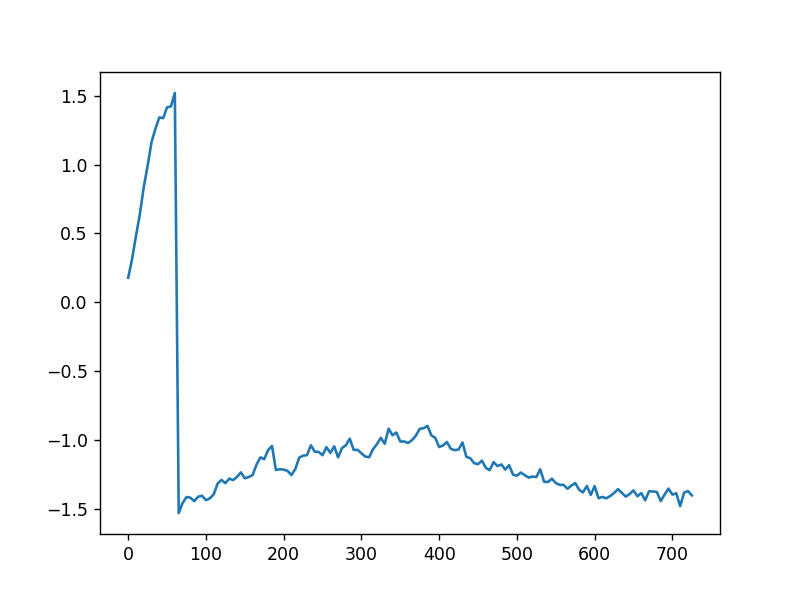

In [73]:
q_target, which, tcali = q6, measure.onwhich[0], 200
dragcoef = None
tdelay = np.arange(0,800,(q_target.pi_len/2),dtype=int)
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.ramseyZpulse, (q_target,measure,tdelay,which,tcali,dragcoef), tags=[q_target.q_name], max=len(tdelay))
t_rz, poplist_rz = await job.done()
coordinate = [[1-2*j[i] for i in range(2)] for j in poplist_rz]
theta = np.array([np.arctan(i[1]/i[0]) for i in coordinate])
plt.figure()
plt.plot(t_rz,theta)
plt.show()

In [59]:
j = 0
theta_new = []
theta_new.append(theta[0])
for i,j in enumerate(theta[1:],start=1):
    if theta_new[i-1]-j>np.pi/2:
        theta_new.append(j+np.pi/2)
    if theta_new[i-1]-j<-np.pi/2:
        theta_new.append(j-np.pi/2)

NameError: name 'theta' is not defined

# RamseyZpulse_chen

In [640]:
q_target, which, tcali = q6, measure.onwhich[0], 190
dragcoef = None
tdelay = np.arange(0,400,(q_target.pi_len/2),dtype=int)
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
t_rz,poplist_rz = [], []
for nozpulse in [True,False]:
    job = Job(mr.ramseyZpulse_chen, (q_target,measure,tdelay,which,tcali,dragcoef,nozpulse), tags=[q_target.q_name], max=len(tdelay))
    t, pop = await job.done()
    t_rz.append(t)
    poplist_rz.append(pop)

Output()

Output()

In [414]:
def test(theta):
    j = 0
    theta_new = []
    theta_new.append(theta[0])
    for i,j in enumerate(theta[1:],start=1):
        while 1:
            if theta_new[i-1]>j+0.8:
                j += np.pi
            else:
                break
        theta_new.append(j)
    return np.array(theta_new)

<IPython.core.display.Javascript object>


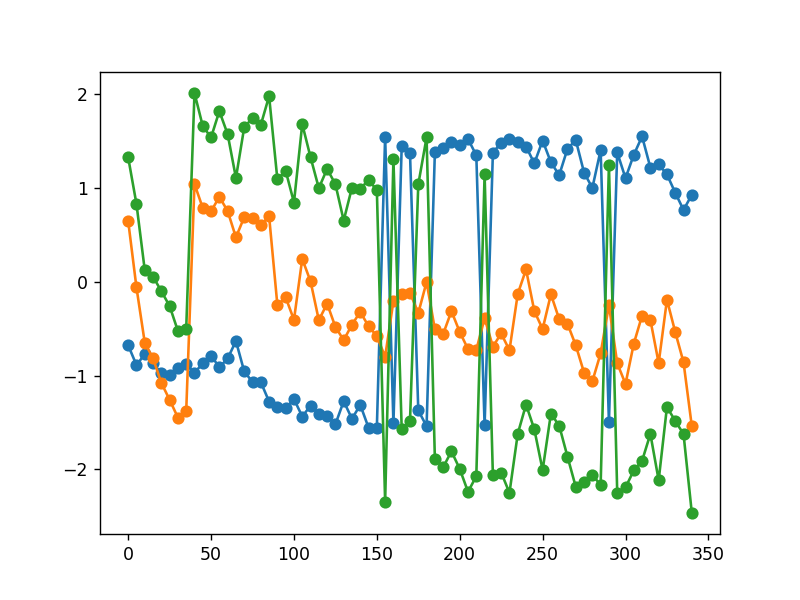

In [641]:
plt.figure()
t = t_rz[0][:,0]
pop_ref, pop_rz = poplist_rz[0], poplist_rz[1]
coordinate_ref = [[1-2*j[i] for i in range(2)] for j in pop_ref]
coordinate_rz = [[1-2*j[i] for i in range(2)] for j in pop_rz]
theta_ref = np.array([np.arctan(i[1]/i[0]) for i in coordinate_ref])
theta_rz = np.array([np.arctan(i[1]/i[0]) for i in coordinate_rz])

# theta_ref = test(theta_ref)
plt.plot(t,theta_ref,'-o')
# theta_rz = test(theta_rz)
plt.plot(t,theta_rz,'-o')
deltatheta = theta_rz - theta_ref
# deltatheta = test(deltatheta)
plt.plot(t,deltatheta,'-o')
plt.show()

In [398]:
np.shape(coordinate_rz)

(84, 2)

In [400]:
c 

[[0.163370253164557, 0.5688291139240507, 0],
 [0.08267405063291144, 0.5280854430379747, 0],
 [0.09335443037974689, 0.5704113924050633, 0],
 [0.08504746835443033, 0.5862341772151899, 0],
 [0.24564873417721522, 0.5803006329113924, 0],
 [0.24683544303797467, 0.5751582278481013, 0],
 [0.2784810126582279, 0.5510284810126582, 0],
 [0.02373417721518989, 0.4489715189873418, 0],
 [0.015427215189873444, 0.5344145569620253, 0],
 [-0.028481012658227778, 0.5284810126582278, 0],
 [0.15625, 0.5569620253164558, 0],
 [0.153876582278481, 0.5427215189873418, 0],
 [0.06685126582278478, 0.45767405063291144, 0],
 [0.27966772151898733, 0.4932753164556962, 0],
 [0.12223101265822789, 0.492879746835443, 0],
 [0.0035601265822784445, 0.4058544303797469, 0],
 [-0.015427215189873333, 0.461629746835443, 0],
 [-0.054193037974683556, 0.4612341772151899, 0],
 [-0.18868670886075956, 0.2689873417721519, 0],
 [-0.11867088607594933, 0.2954905063291139, 0],
 [-0.1586234177215189, 0.3817246835443038, 0],
 [-0.202136075949367

In [397]:
np.arctan(coordinate_rz[9][1]/coordinate_rz[9][0])

-1.5169561948215944

<IPython.core.display.Javascript object>


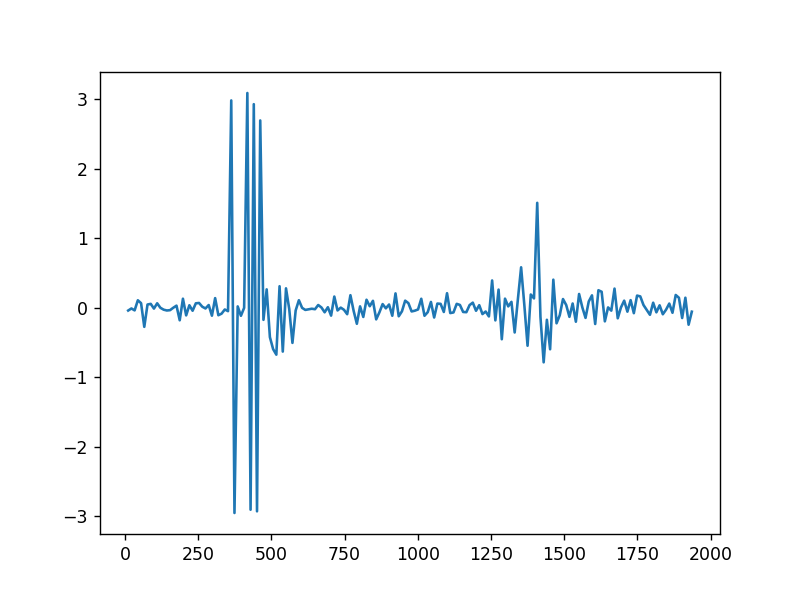

In [233]:
plt.figure()
deltatheta = np.diff(deltatheta)
plt.plot(t[1:],deltatheta)
plt.show()

# CrossTalk矫正

In [ ]:
t_rabi = np.linspace(0,100,201)
measure.wave['Read'] = [['Readout_I']*len(t_rabi),['Readout_Q']*len(t_rabi)]

In [ ]:
bits = [q1,q2,q3,q4,q5,q6,q7]
z_crosstalk = np.ones((10,10))

In [ ]:
# fig, axes = plt.subplots(ncols=7,nrows=7,figsize=(28,28))
%matplotlib inline
await mr.jpa_switch(measure,'ON')
for v,k in enumerate(bits,start=0):
    q_target = k
    print(q_target.q_name)
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await mr.RecoverInst(measure,state=q_target.state[0])
    mr.Att_Setup(q_target.inst['com']).Att(q_target.power_rabi)
    for i,j in enumerate(bits):
        q_bias = j
        tag = q_target.q_name + '_' + q_bias.q_name
        if q_bias == q_target:
            if q_target.f_ex[0] > 3.9e9:
                v_rabi = np.linspace(-0.5,0.5,201)
            else:
                v_rabi = np.linspace(-0.05,0.05,201)
        else:
            v_rabi = np.linspace(-1,1,201)
        job = Job(mr.Z_cross, (q_target,q_bias,measure,v_rabi,(len(v_rabi)-1),True), tags=[tag], max=500,avg=True)
        v_Z, s_Z = await job.done()
#         await awg131.use_waveform(name='test',ch=i+1)
        await mr.InitInst(measure,psgdc=False,awgch=True)
        try:
            A, C, W, phi = op.Cos_Fit().fitCos(v_Z[:,0], np.abs(s_Z[:,0]))
        except Exception or RuntimeWarning:
            print('bad fitting')
            A, C, W, phi =0,0,0,0
        z = A*np.cos(2*np.pi*W*v_Z+phi)+C
        v_op = op.RowToRipe().firstMax(v_Z[:,0],np.abs(z[:,0]),num=0)
        W = -W if v_op < 0 else W
        z_crosstalk[v,i] = W
        plt.figure()
        plt.plot(v_Z,abs(s_Z))
        plt.plot(v_Z,z)
        plt.vlines(0,np.max(np.abs(s_Z[:,0])),np.min(np.abs(s_Z[:,0])),'r')
        plt.title(r'$%s-%s,W = %g,phi=%g,A=%g $' %(q_target.q_name,q_bias.q_name,W,phi,A))
        plt.show()
    await mr.InitInst(measure,psgdc=True,awgch=True)


In [ ]:
z_crosstalk

# 直流crosstalk矫正

In [574]:
dc_crosstalk = np.eye(10)

In [ ]:
bits = [q1,q2,q3,q4,q5,q6,q7]
await psg_trans.setValue('Power',13)
mr.Att_Setup(measure,'com8').Att(25)
# await cw.modulation_ex(q1,measure)
for v, k in enumerate(bits):
    q_target = k
    for i,j in enumerate(bits):
        q_bias = j
        if q_bias == q_target:
            continue
        else:
            tag = q_target.q_name + '_' + q_bias.q_name
            print(tag)
            job = Job(mr.dcCrosstalk, (q_target,q_bias,measure), tags=[tag], max=40)
            v_bias, s_sc = await job.done()
            x, y = v_bias[:,0], np.abs(s_sc[:,0])
            a,b,c,d,band = op.Lorentz_Fit().fitLorentz(x,y)
            ratio = -b/0.005
            dc_crosstalk[eval(q_target.q_name[1:]),eval(q_bias.q_name[1:])] = ratio
            z = a/(1.0+c*(x-b)**2)+d
            plt.figure()
            plt.plot(x,y)
            plt.plot(x,z)
            plt.title(tag+f'ratio={ratio}')
            plt.savefig(r'D:\skzhao\file_name\figure\%s.png'%tag)
            plt.close()
            clear_output()
            await mr.InitInst(measure,psgdc=True,awgch=False)
    await mr.InitInst(measure,psgdc=True,awgch=False)

# 二维谱

In [94]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.6,5.95,0.001)*1e9
bits = [q2,q8,q10]
await psg_trans.setValue('Power',2)
for k, i in enumerate(bits):
    await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
#     if k == 0:
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
#     elif k == len(bits_target)-1:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#     else:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
    job = Job(mrw.spec2d, (i,measure,freq,None), tags=[i.q_name], max=32)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [ ]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.3,5.5,0.001)*1e9
bits = [q1,q3,q4,q5,q6,q7,q9]
await psg_trans.setValue('Power',2)
for k, i in enumerate(bits):
    await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
#     if k == 0:
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
#     elif k == len(bits_target)-1:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#     else:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
    job = Job(mrw.spec2d, (i,measure,freq,None), tags=[i.q_name], max=32)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

q4


Output()

In [ ]:
np.linspace(-q3.T_bias[0]*0.3,q3.T_bias[0]*0.3,31) + q3.T_bias[1] 

# 二维谱AWG

In [69]:
data = np.load(r'D:/QuLabData/2020/1008/crosstalk_cali/zheng_crosstalk_q1-10_20201008222347.npz')
calimatrix = np.mat(data['mat'])
measure.readamp = 1    #扫描范围是0.5就可以从顶往下扫1.3G

In [15]:
q10.T_z

[1.787, 0.056]

In [463]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.7,5.4,0.002)*1e9
current = np.linspace(-1,1,21)
bits = [q1]
calimatrix=None
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
#     await mr.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=21)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [12]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.3,5.75,0.002)*1e9
current = np.linspace(-0.5,0.5,51)
bits = [q10]
calimatrix=None
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
#     await mr.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=41)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [201]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.3,5.9,0.002)*1e9
current = np.linspace(-0.5,0.5,51)
bits = [q2]
calimatrix=None
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
#     await mr.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=41)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [199]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.4,5.5,0.002)*1e9
current = np.linspace(-0.5,0.5,51)
bits = [q6]
calimatrix=None
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
#     await mr.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=51)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [200]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.1,5.2,0.002)*1e9
current = np.linspace(-0.5,0.5,51)
bits = [q5]
calimatrix=None
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
#     await mr.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=51)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

# RB_waveform

## reference

In [92]:
mlist, q_target, len_data, which, gate = np.logspace(0.4,2.8,16,dtype=int), q6, 30, measure.offwhich[0], False
dragcoef = 0.8/q_target.alpha/2/np.pi
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.RB_waveform,(q_target,measure,mlist,len_data,which,110e6,dragcoef,gate),tags=[q_target.q_name,'reference','nodrag'],no_bar=True)
n_RBw, pop_RBw = await job.done()

Output()

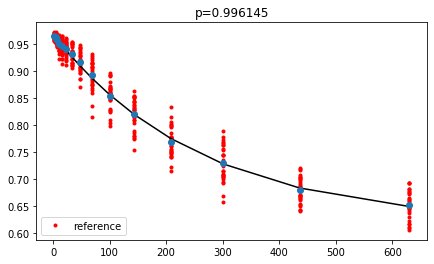

In [91]:
n, pop = n_RBw, pop_RBw
x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
plt.figure(figsize=(7,4))
plt.plot(x.flatten(),pop.flatten(),'r.',label='reference')
plt.legend(loc='lower left')
x, y = n_RBw[:,0], np.abs(np.mean(pop,axis=1))
A,B,p = op.RB_Fit().fitRB(x,y)
z = A*p**x+B
plt.plot(x,z,'k')
plt.plot(x,y,'o')
plt.title('p=%f'%p)
plt.show()

## gate

In [366]:
mlist, q_target, len_data, which = np.logspace(0.4,2.8,16,dtype=int), q6, 30, measure.offwhich[0]
dragcoef = 0.8/q_target.alpha/2/np.pi

await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
for gate in ['2','3','4','5','6','7'][:1]:
    job = Job(mr.RB_waveform, (q_target,measure,mlist,len_data,which,110e6,dragcoef,gate), tags=[q_target.q_name,gate],no_bar=True)
    n_RBw, pop_RBw = await job.done()
await mr.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])

Output()

Output()

Output()

<IPython.core.display.Javascript object>


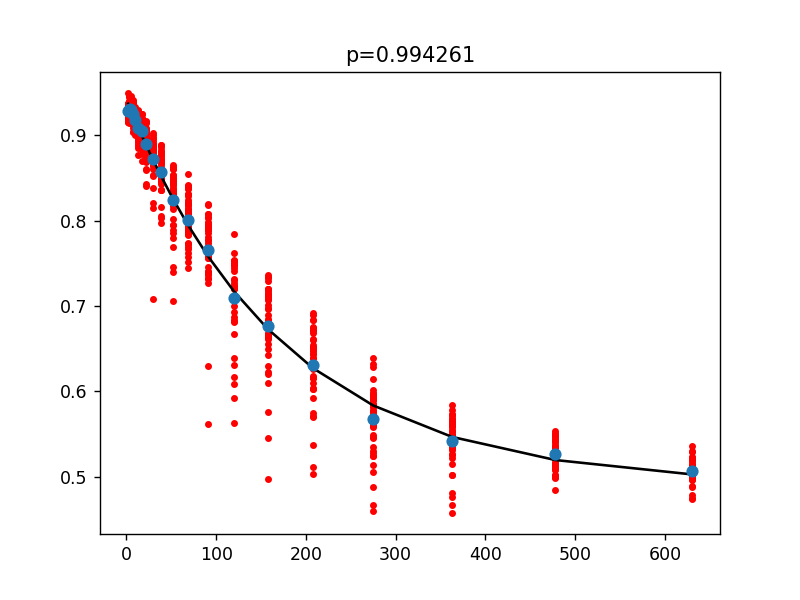

In [64]:
n, pop = n_RBw, pop_RBw
x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
plt.figure(figsize=(7,4))
plt.plot(x.flatten(),pop.flatten(),'r.',label=gate)
plt.legend(loc='lower left')
x, y = n_RBw[:,0], np.abs(np.mean(pop,axis=1))
A,B,p = op.RB_Fit().fitRB(x,y)
z = A*p**x+B
plt.plot(x,z,'k')
plt.plot(x,y,'o')
plt.set_title('p=%f'%p)
plt.show()

In [70]:
Pref, Pgate, d = 0.9946, 0.994261, 2**(1)
Rgate = (1-Pgate/Pref)*(1-1/d)
Rgate

-0.003516601051131496

# 单比特tomo

In [551]:
q_target, which = q6, measure.onwhich
dragcoef = None
t_rabi = np.linspace(1,30,31)
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.tomo, (q_target,measure,t_rabi,which,dragcoef), tags=[q_target.q_name], max=len(t_rabi))
t_tomo, poplist = await job.done()

Output()

In [553]:
poplist

array([[0.4414557 , 0.68255538, 0.09434335],
       [0.44165348, 0.74643987, 0.14893196],
       [0.42464399, 0.84355222, 0.27650316],
       [0.44719146, 0.88627373, 0.40842563],
       [0.40051424, 0.89181171, 0.40150316],
       [0.38172468, 0.87440665, 0.58049842],
       [0.43908228, 0.7903481 , 0.7252769 ],
       [0.44481804, 0.71064082, 0.81863133],
       [0.38548259, 0.55439082, 0.89121835],
       [0.42780854, 0.42147943, 0.89339399],
       [0.47982595, 0.28322785, 0.84196994],
       [0.43413766, 0.17246835, 0.77907437],
       [0.45193829, 0.10324367, 0.65288766],
       [0.46677215, 0.05953323, 0.49545095],
       [0.45431171, 0.0820807 , 0.34572785],
       [0.47290348, 0.14102057, 0.23457278],
       [0.46756329, 0.23971519, 0.15268987],
       [0.47606804, 0.37321994, 0.0846519 ],
       [0.47448576, 0.51681171, 0.06784019],
       [0.45945411, 0.63073576, 0.09236551],
       [0.47883703, 0.75613133, 0.17780854],
       [0.47606804, 0.84177215, 0.28560127],
       [0.

In [554]:
data = [[1-2*j[i] for i in range(3)] for j in poplist]
data

[[0.11708860759493667, -0.3651107594936709, 0.8113132911392404],
 [0.11669303797468356, -0.4928797468354431, 0.7021360759493671],
 [0.15071202531645567, -0.6871044303797469, 0.446993670886076],
 [0.10561708860759489, -0.7725474683544304, 0.18314873417721522],
 [0.19897151898734178, -0.7836234177215189, 0.196993670886076],
 [0.23655063291139244, -0.7488132911392404, -0.160996835443038],
 [0.12183544303797467, -0.5806962025316456, -0.45055379746835444],
 [0.11036392405063289, -0.4212816455696202, -0.637262658227848],
 [0.22903481012658233, -0.10878164556962022, -0.7824367088607596],
 [0.1443829113924051, 0.15704113924050633, -0.7867879746835442],
 [0.04034810126582278, 0.43354430379746833, -0.6839398734177216],
 [0.13172468354430378, 0.6550632911392404, -0.5581487341772151],
 [0.096123417721519, 0.7935126582278481, -0.3057753164556962],
 [0.06645569620253167, 0.8809335443037974, 0.009098101265822778],
 [0.091376582278481, 0.8358386075949367, 0.30854430379746833],
 [0.054193037974683556, 

In [401]:
np.savez('z.npz',data=c)

In [284]:
x = [['I1','I2'],['Q1','Q2']]*2

In [288]:
[x[0]*2,x[1]*2]

[['I1', 'I2', 'I1', 'I2'], ['Q1', 'Q2', 'Q1', 'Q2']]

In [287]:
x

[['I1', 'I2'], ['Q1', 'Q2'], ['I1', 'I2'], ['Q1', 'Q2']]

In [270]:
import qulab.waveform_new as wn

In [276]:
cos = wn._basic_wave(wn.COS, 2*np.pi/10)
pulse = wn._add(wn._mul(cos, a), b)
pulse

((((), ()), (((4, 0, 0.6283185307179586),), (1,))), (0.54, 0.46))

In [275]:
a = wn._const(0.46)
b = wn._const(0.54)

In [286]:
t_lst = np.linspace(-90000,10000,250000)*1e-9
pulse = wn.hanning(10000/1e9)
wav = pulse(t_lst)

<IPython.core.display.Javascript object>


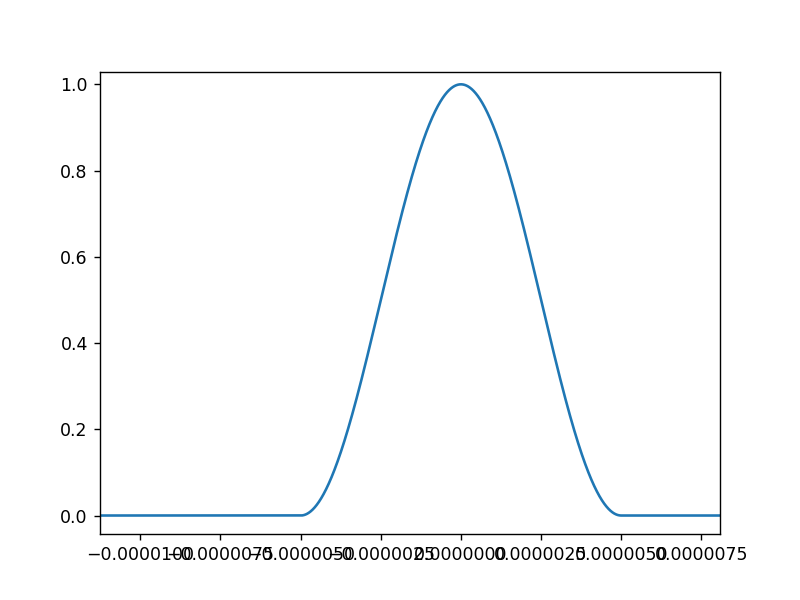

In [287]:
plt.figure()
plt.plot(t_lst,wav)